In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Rome (August 2015).csv',
                   encoding='utf8')

In [3]:
rome.head(2)

,Unnamed: 0,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,1318,1482,Entire home/apt,NaN,VI Municipio,17,5.0,2.0,2.0,1.0,66.0,5.0,41.876495,12.543356,2015-08-29 19:26:35.020747
1,1,1650,1822,Private room,NaN,XVII Municipio,108,4.5,3.0,1.0,0.5,75.0,1.0,41.917495,12.460583,2015-08-29 19:26:35.020747


In [4]:
rome.drop('city', axis=1, inplace=True)

In [62]:
rome.neighborhood.unique()

array([u'I Municipio', u'VII Municipio', u'III Municipio', u'II Municipio',
       u'XI Municipio', u'IX Municipio', u'VI Municipio',
       u'XVIII Municipio', u'XII Municipio', u'XVII Municipio',
       u'XIX Municipio', u'XVI Municipio', u'XV Municipio', u'X Municipio',
       u'V Municipio', u'IV Municipio', u'XX Municipio', u'XIII Municipio'], dtype=object)

In [7]:
rome.room_type.isnull().sum()

0

In [8]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15703 entries, 0 to 15702
Data columns (total 15 columns):
Unnamed: 0              15703 non-null int64
room_id                 15703 non-null int64
host_id                 15703 non-null int64
room_type               15703 non-null object
neighborhood            15703 non-null object
reviews                 15703 non-null int64
overall_satisfaction    10656 non-null float64
accommodates            12861 non-null float64
bedrooms                15670 non-null float64
bathrooms               15537 non-null float64
price                   15703 non-null float64
minstay                 14320 non-null float64
latitude                15703 non-null float64
longitude               15703 non-null float64
collected               15703 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [9]:
rome.bedrooms.isnull().sum()

33

In [10]:
rome.bedrooms.unique()

array([  2.,   1.,   3.,   0.,   4.,  nan,   5.,   8.,   6.,   7.,   9.])

In [11]:
rome = rome[rome['bedrooms'].notnull()]

In [12]:
rome.bathrooms[rome.bathrooms==0].value_counts()

0.0    61
Name: bathrooms, dtype: int64

In [13]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
rome = rome[rome['bathrooms'] != 0.]

In [14]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15609 entries, 0 to 15702
Data columns (total 15 columns):
Unnamed: 0              15609 non-null int64
room_id                 15609 non-null int64
host_id                 15609 non-null int64
room_type               15609 non-null object
neighborhood            15609 non-null object
reviews                 15609 non-null int64
overall_satisfaction    10596 non-null float64
accommodates            12775 non-null float64
bedrooms                15609 non-null float64
bathrooms               15444 non-null float64
price                   15609 non-null float64
minstay                 14232 non-null float64
latitude                15609 non-null float64
longitude               15609 non-null float64
collected               15609 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.9+ MB


In [16]:
ro = rome[['bedrooms','bathrooms']]

In [17]:
ro.sort_values('bedrooms', inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
ro.head(2)

,bedrooms,bathrooms
12829,0.0,1.0
14097,0.0,1.0


In [19]:
rome.sort_values('bedrooms', inplace=True)

In [20]:
rome = rome.reset_index()

In [21]:
rome.head(2)

,index,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,12829,12829,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,14097,14097,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [22]:
rome.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [23]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [28]:
#rome['bathrooms'][rome['bedrooms']==2.]

In [29]:
# Imputation for Bathrooms
rome.bathrooms.fillna(method='bfill',inplace=True)


In [171]:
#cop.bathrooms[paris.bedrooms==3]

In [172]:
#cop

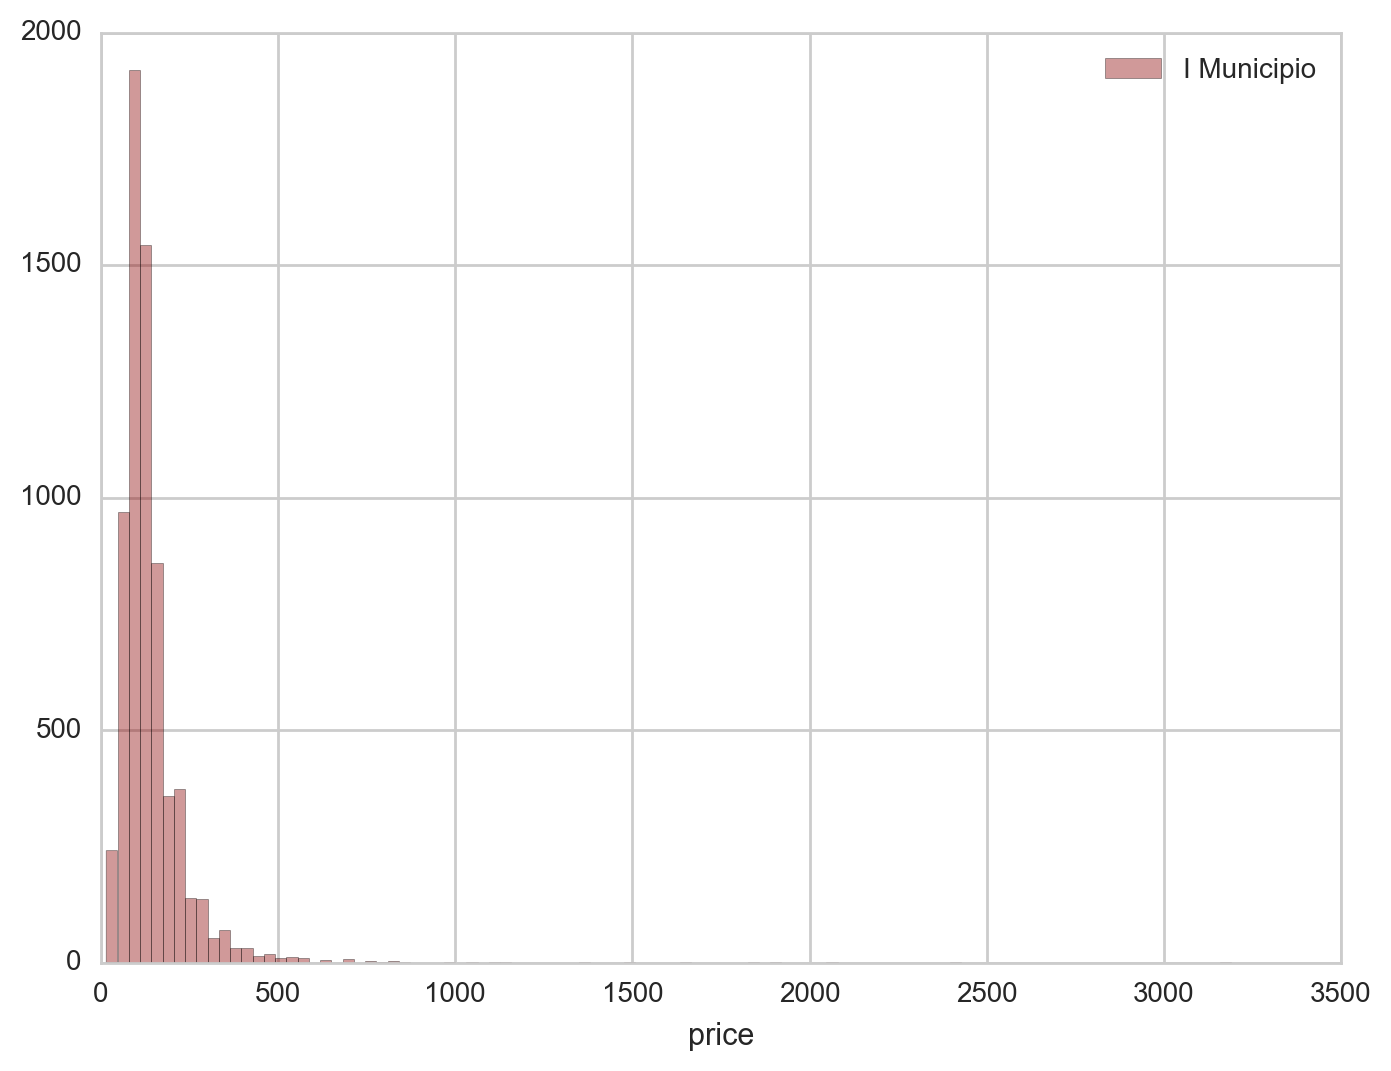

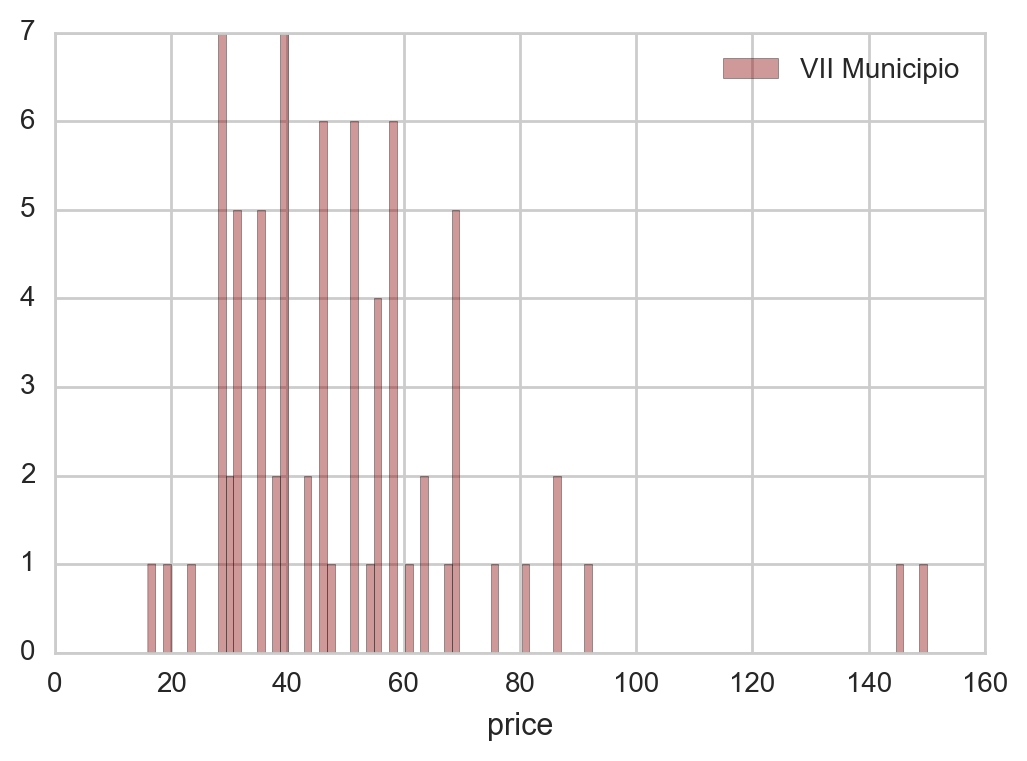

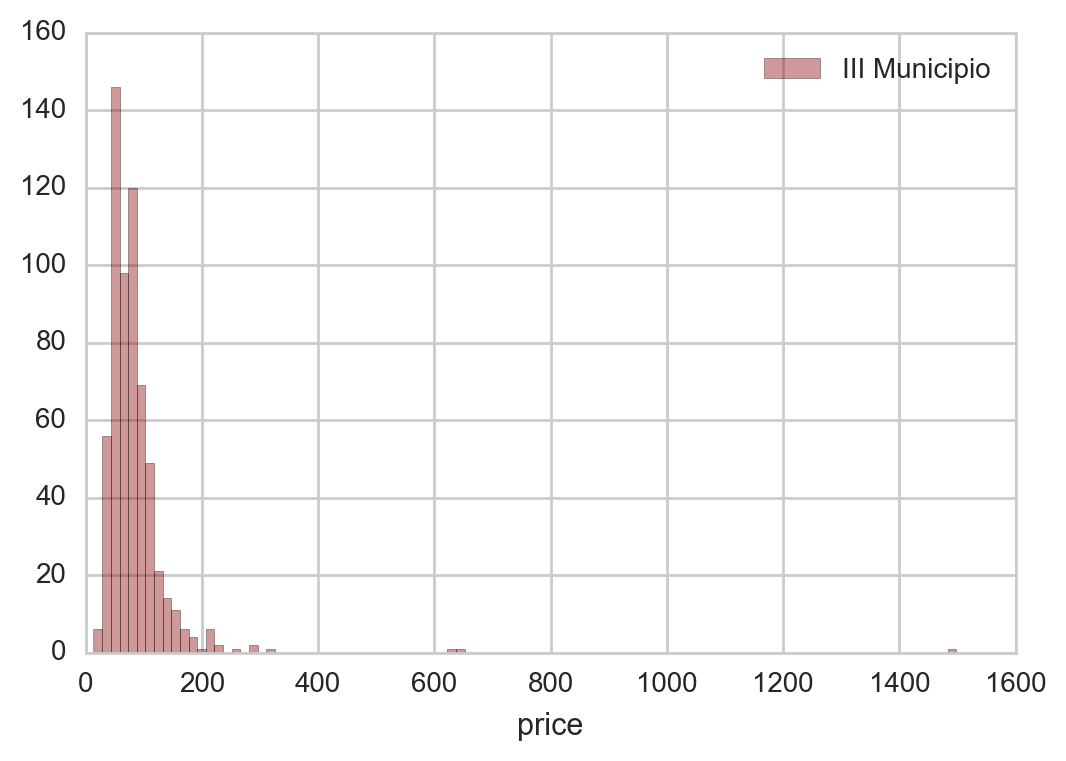

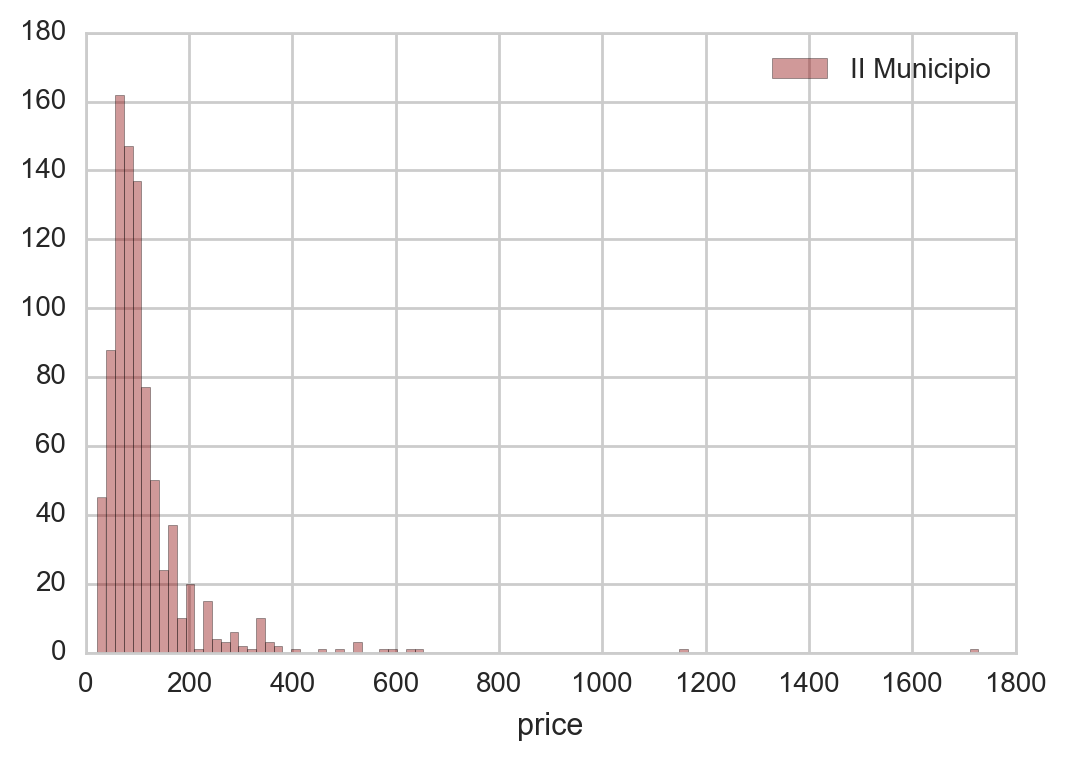

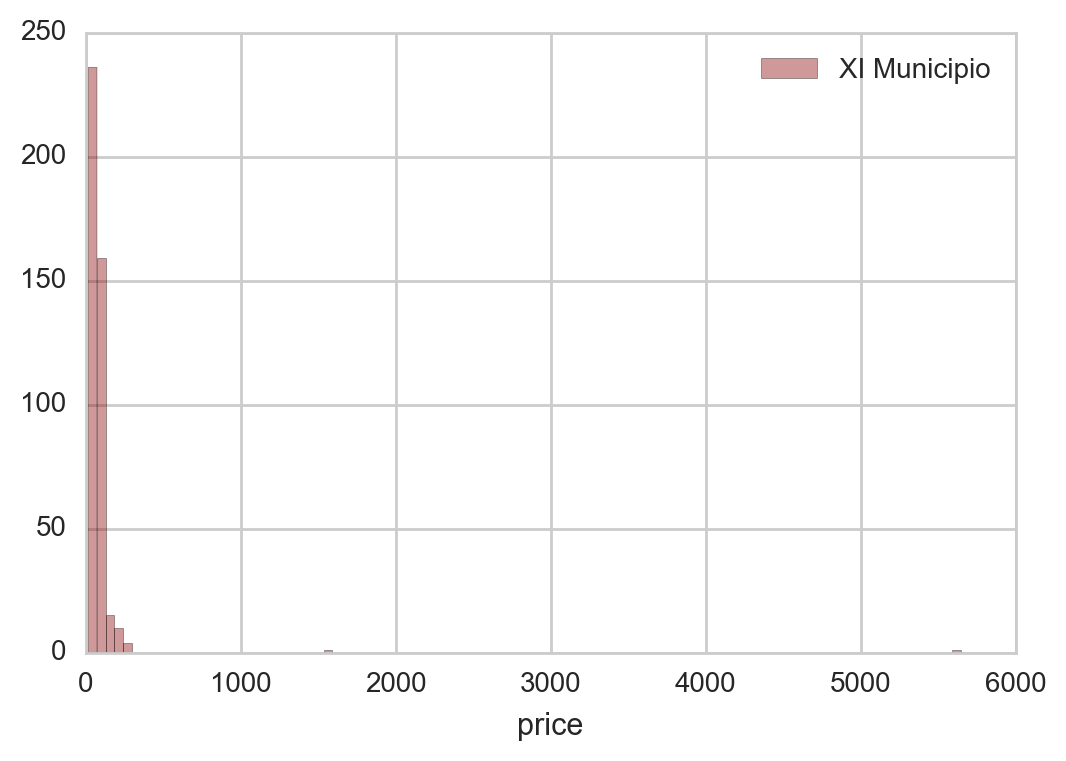

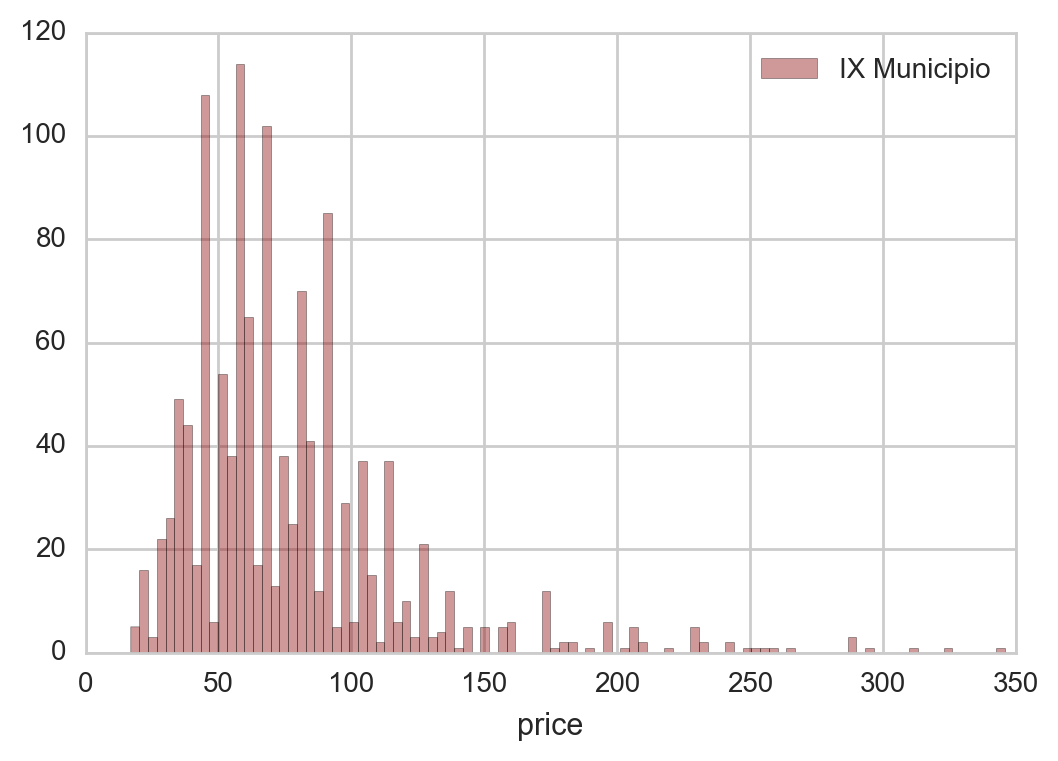

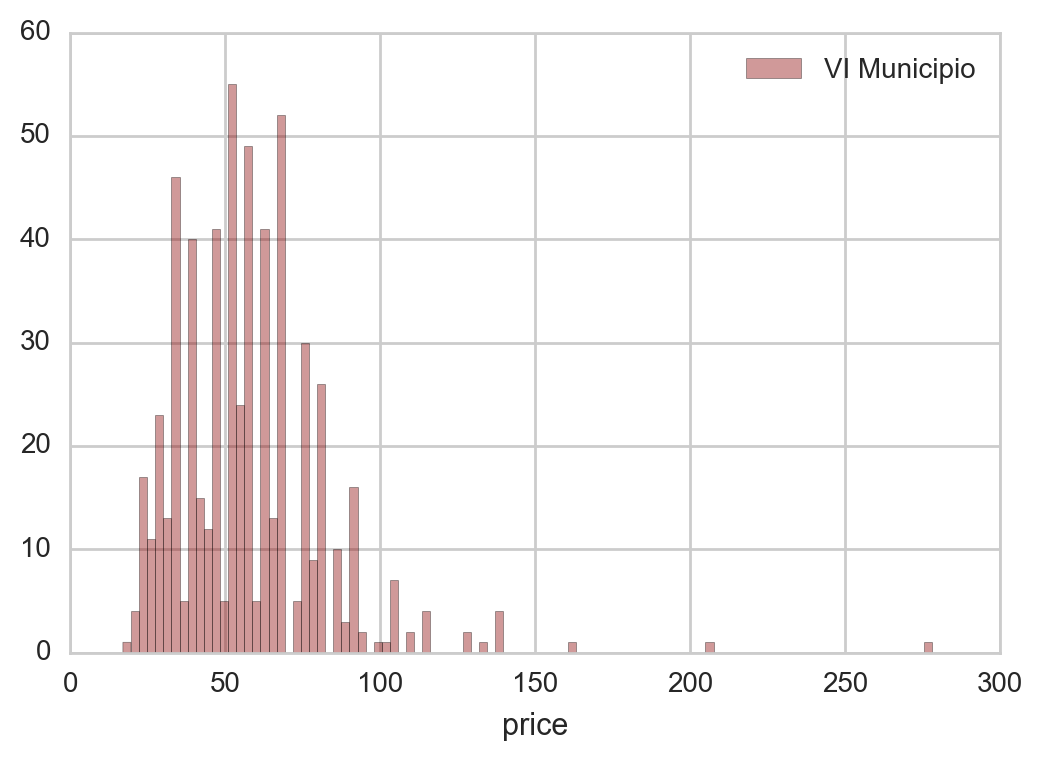

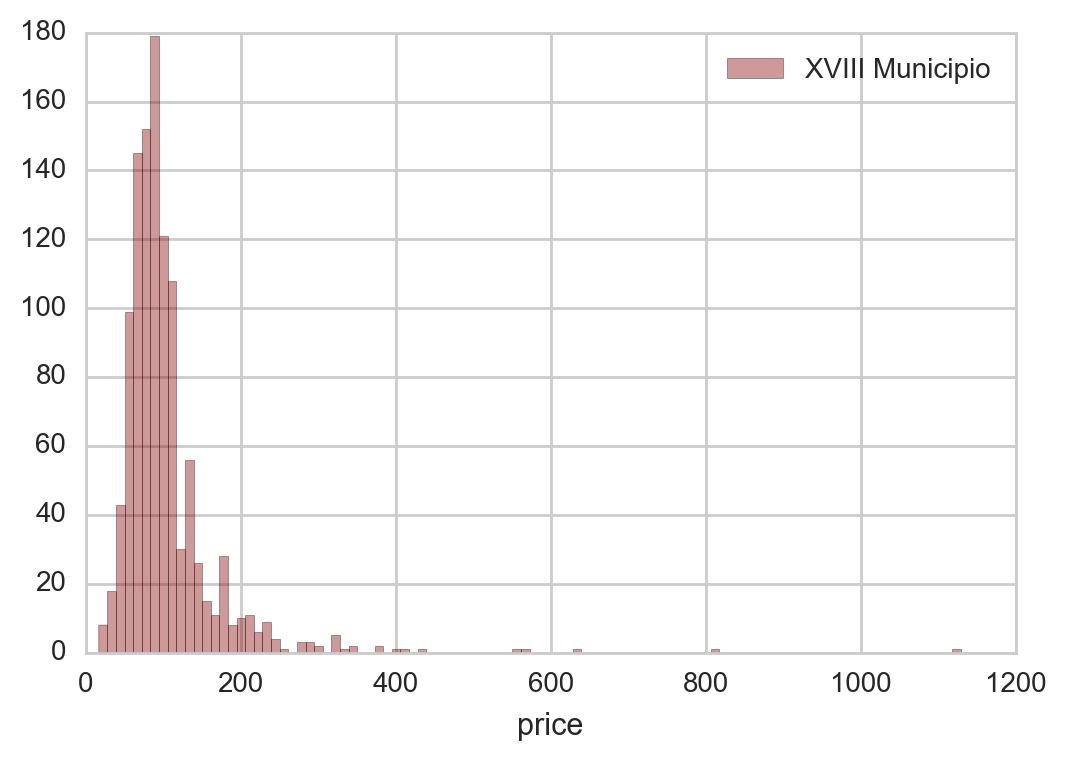

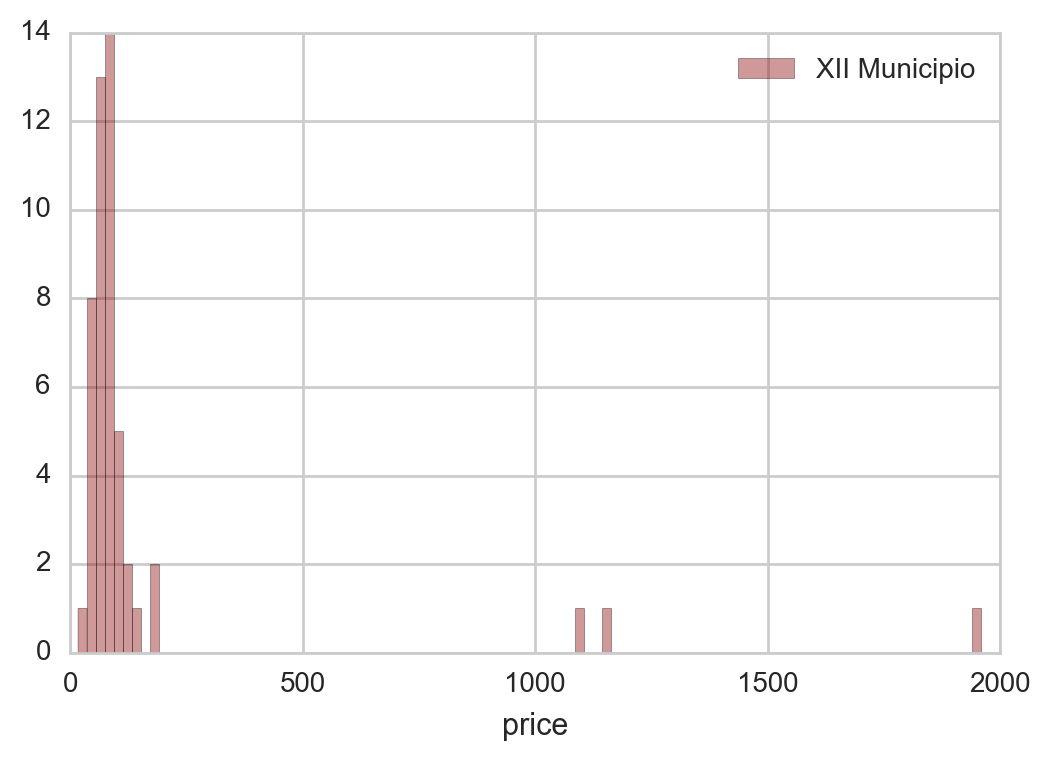

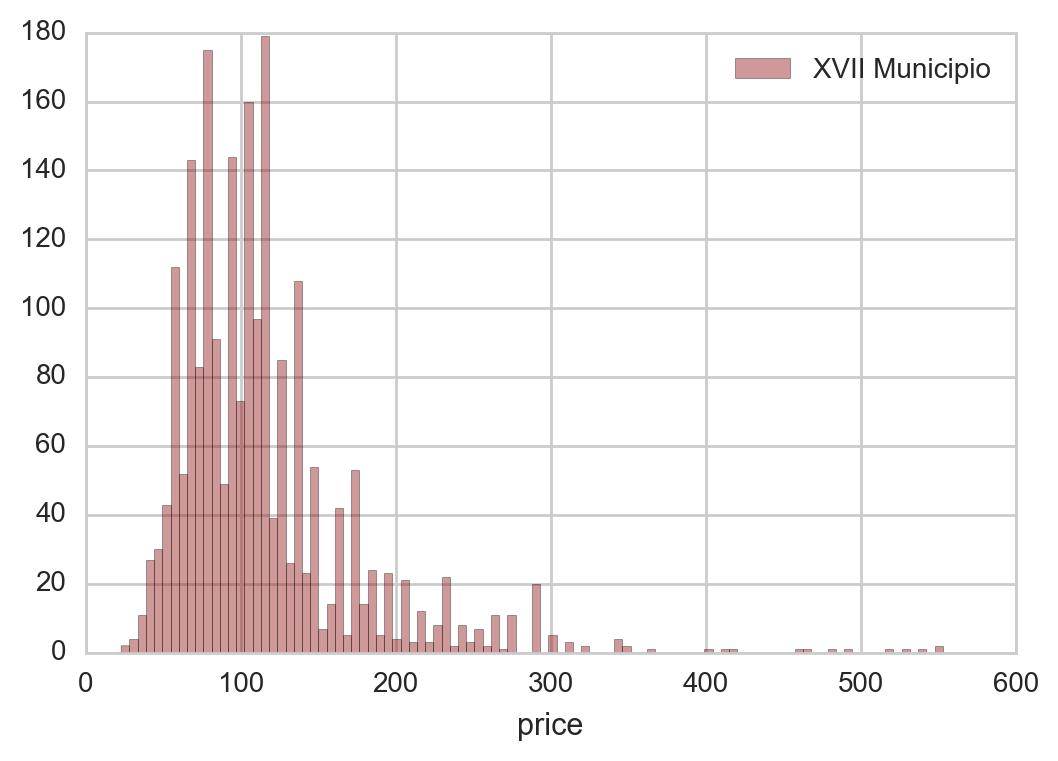

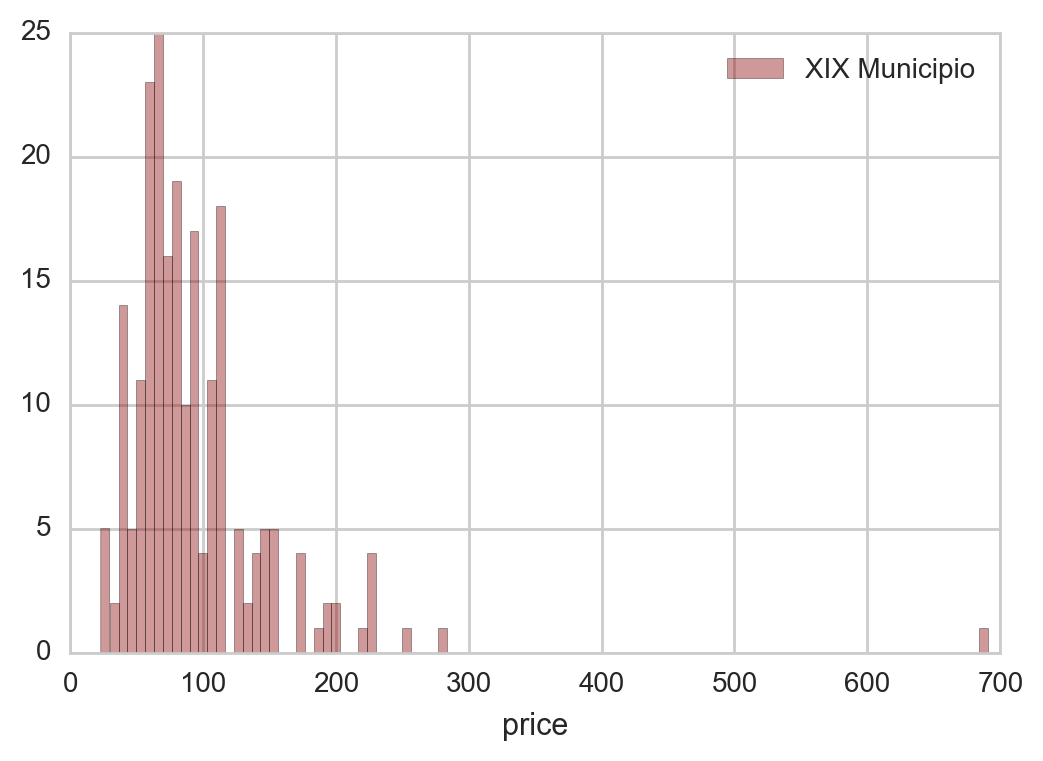

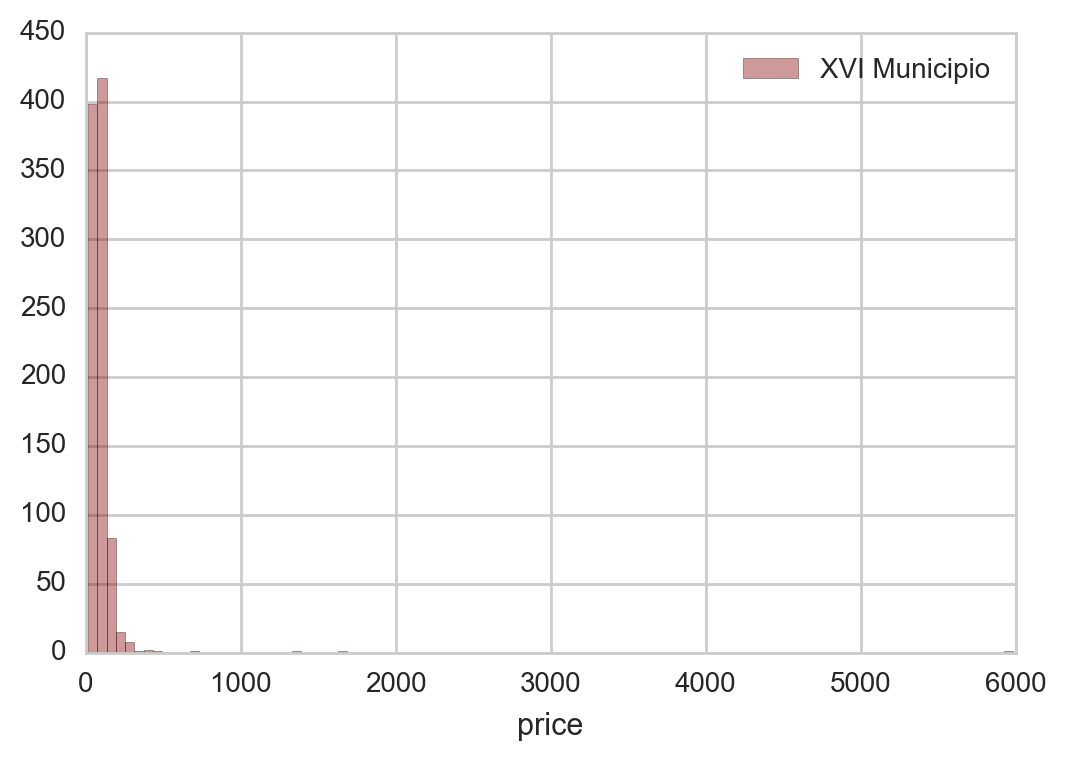

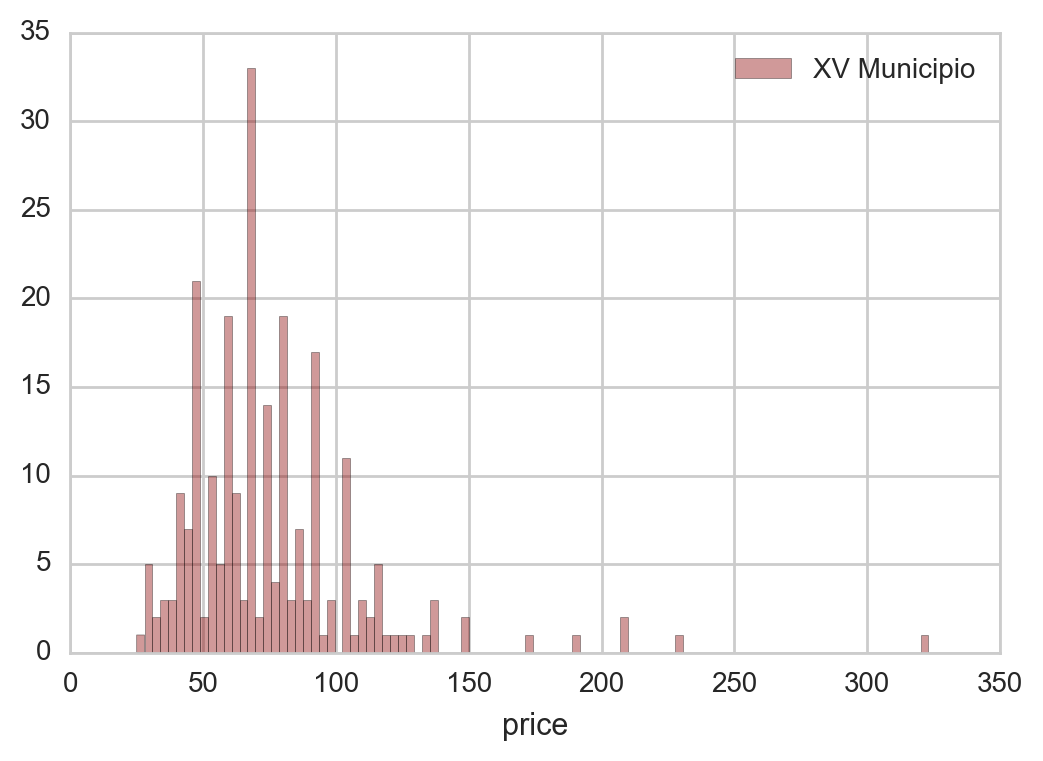

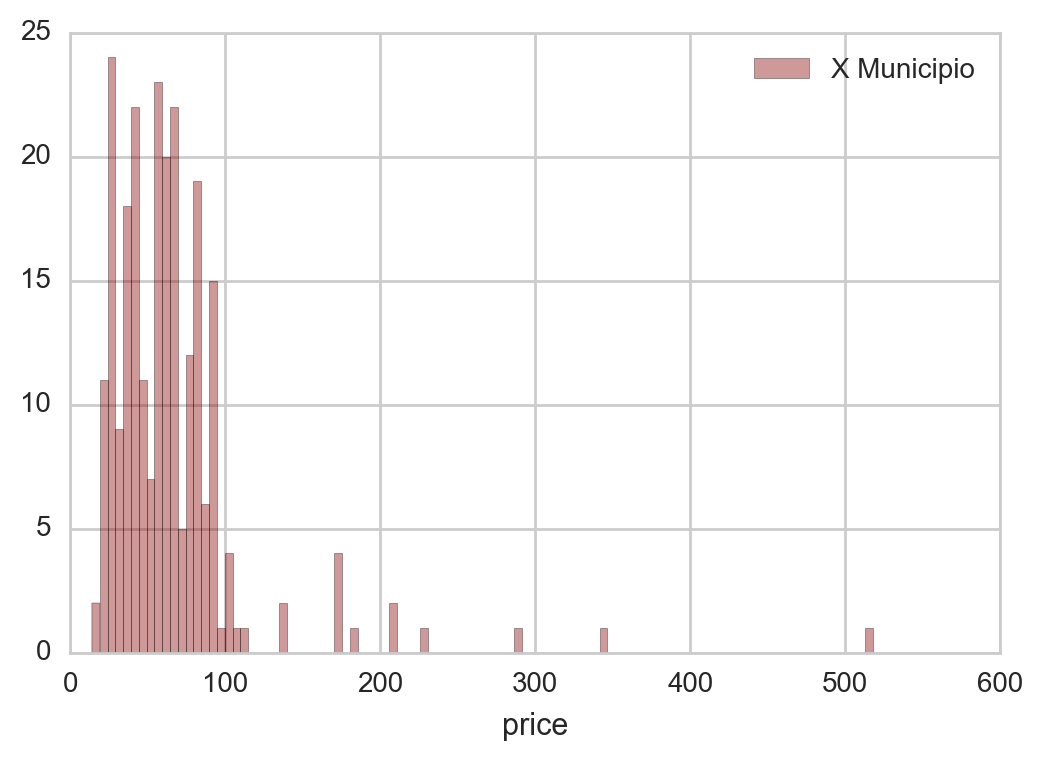

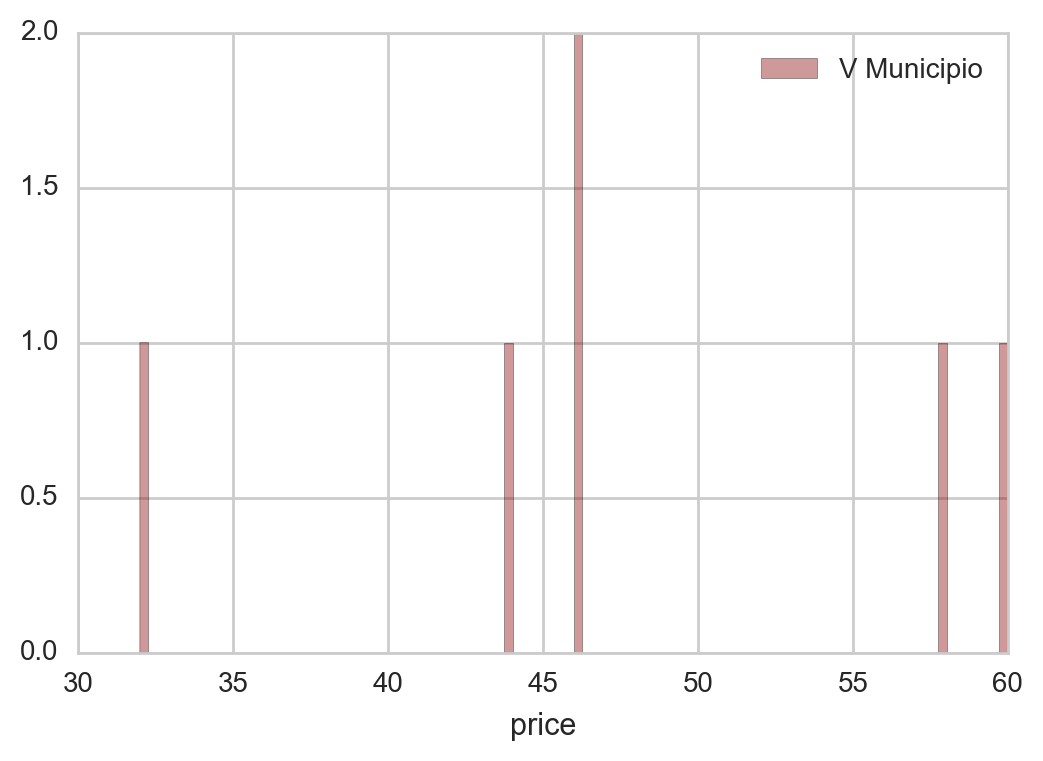

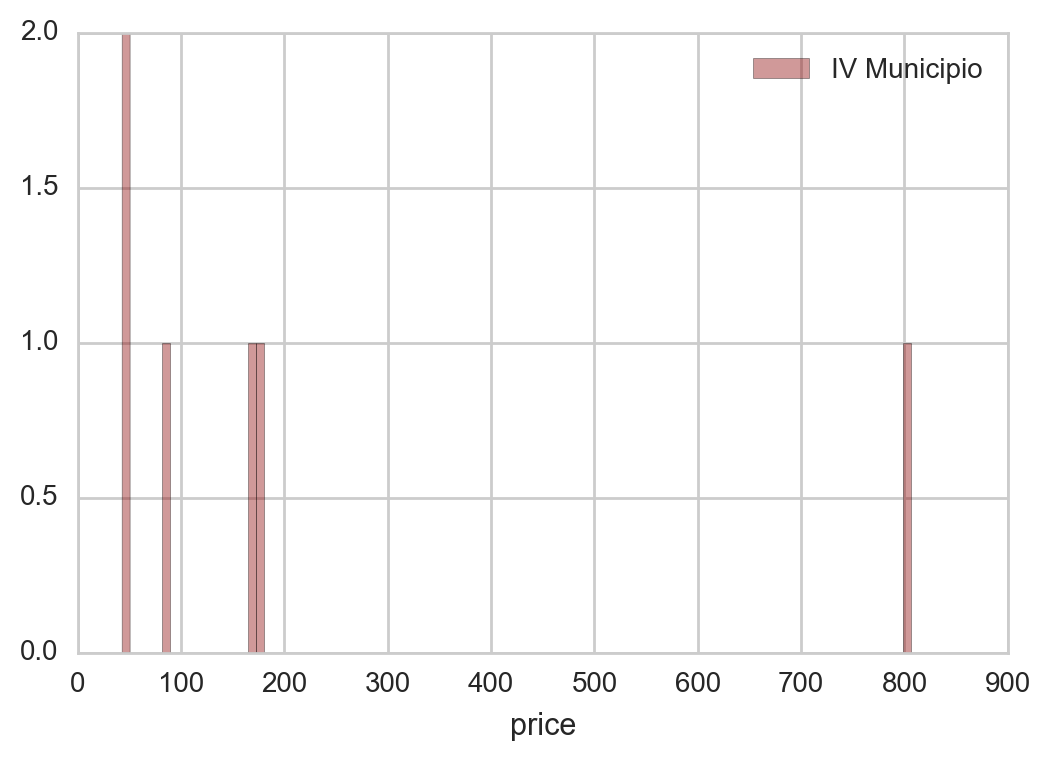

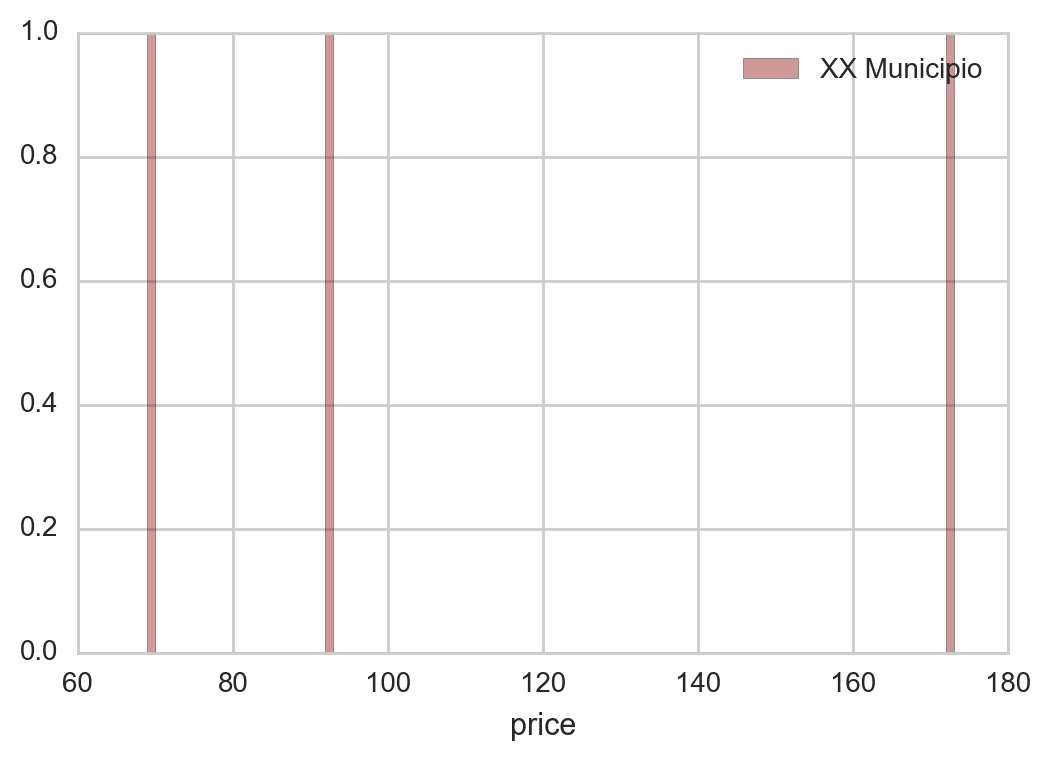

ValueError: x must be 1D or 2D

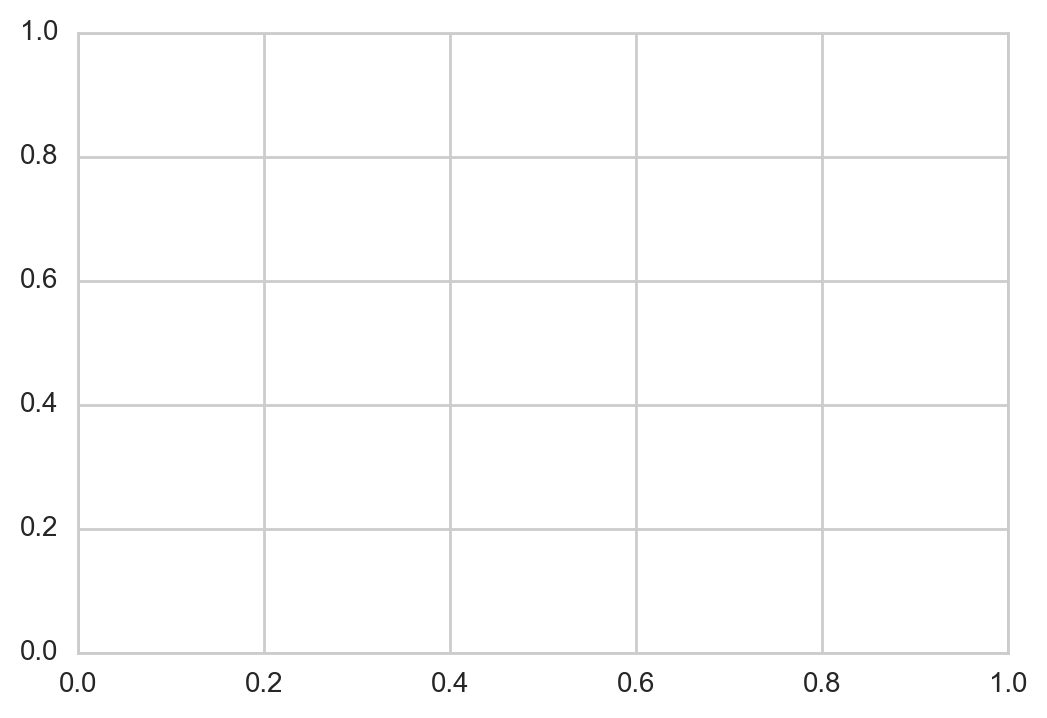

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(rome.neighborhood.unique())):
    ro = rome[rome.neighborhood == rome.neighborhood.unique()[i]]
    
    ax = sns.distplot(ro.price, color='darkred', bins=100, kde=False, 
                      label = rome.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 1500])
    plt.show()

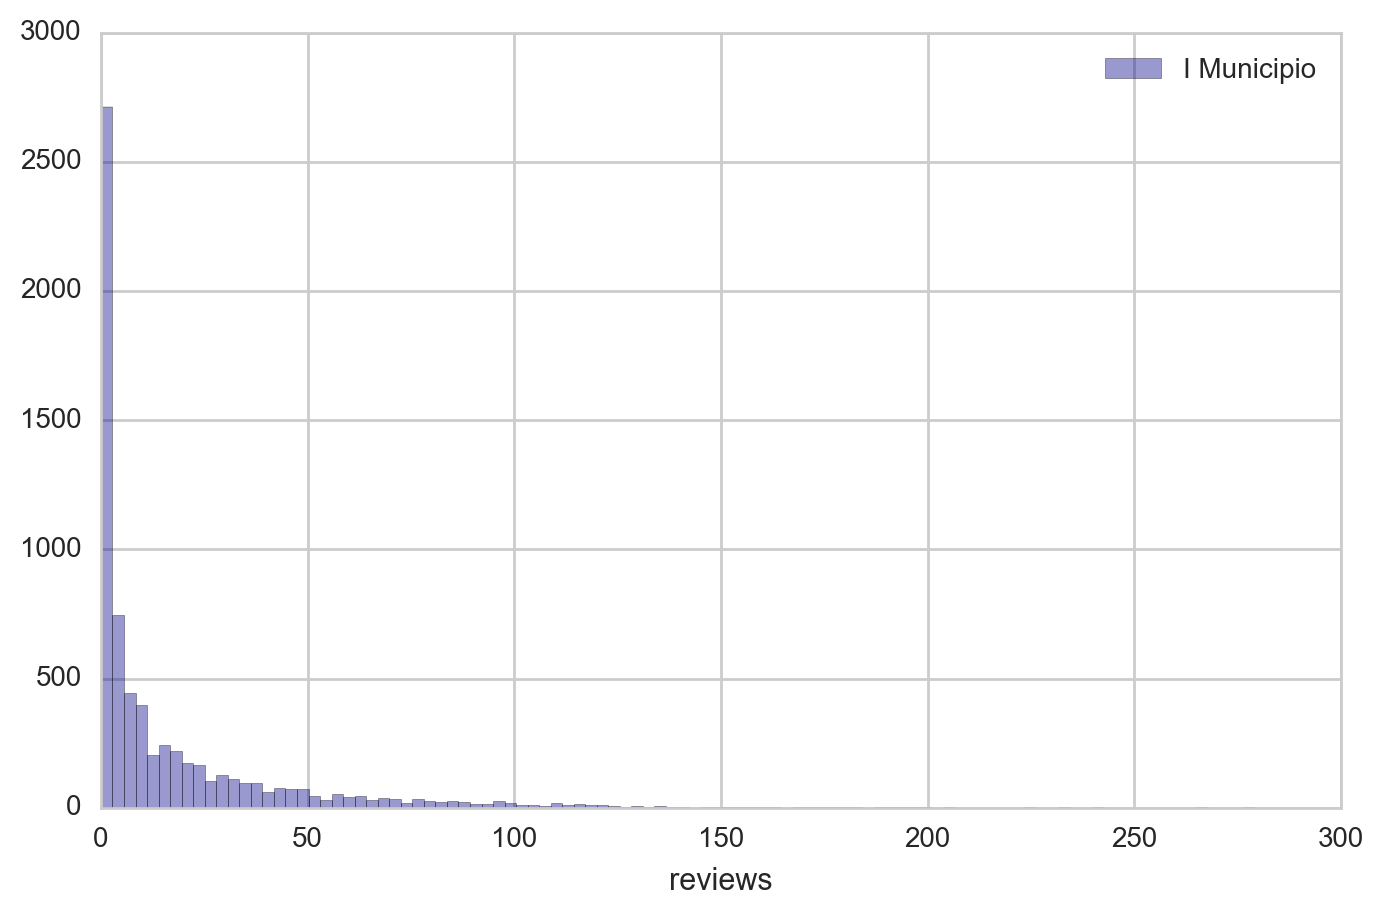

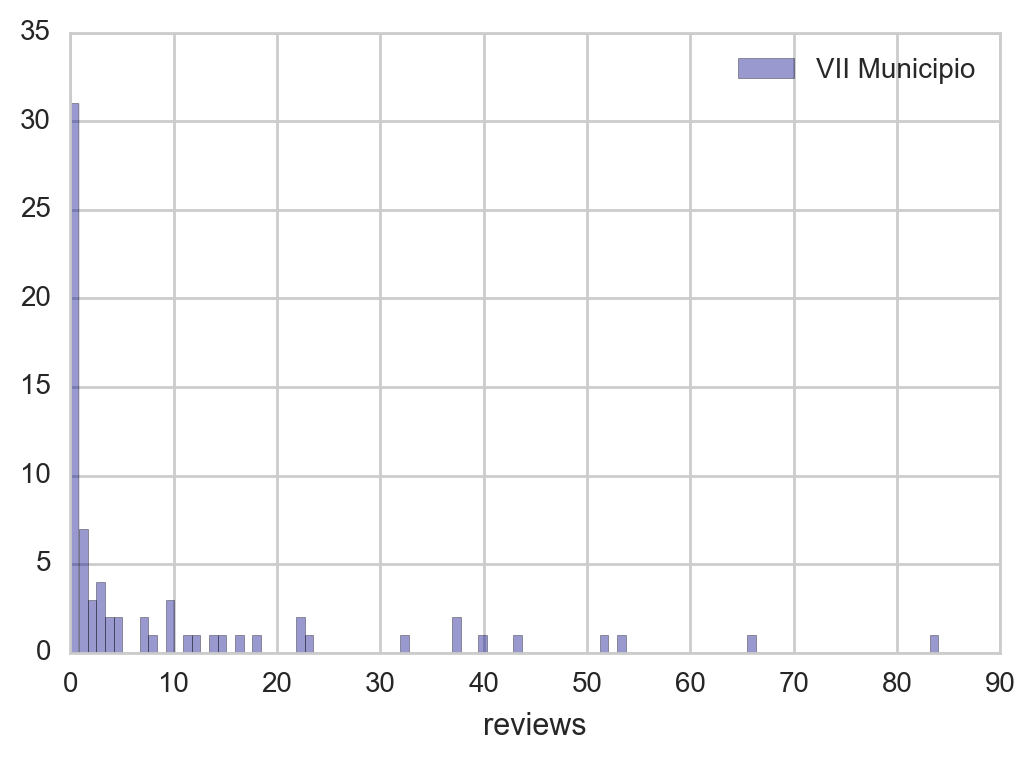

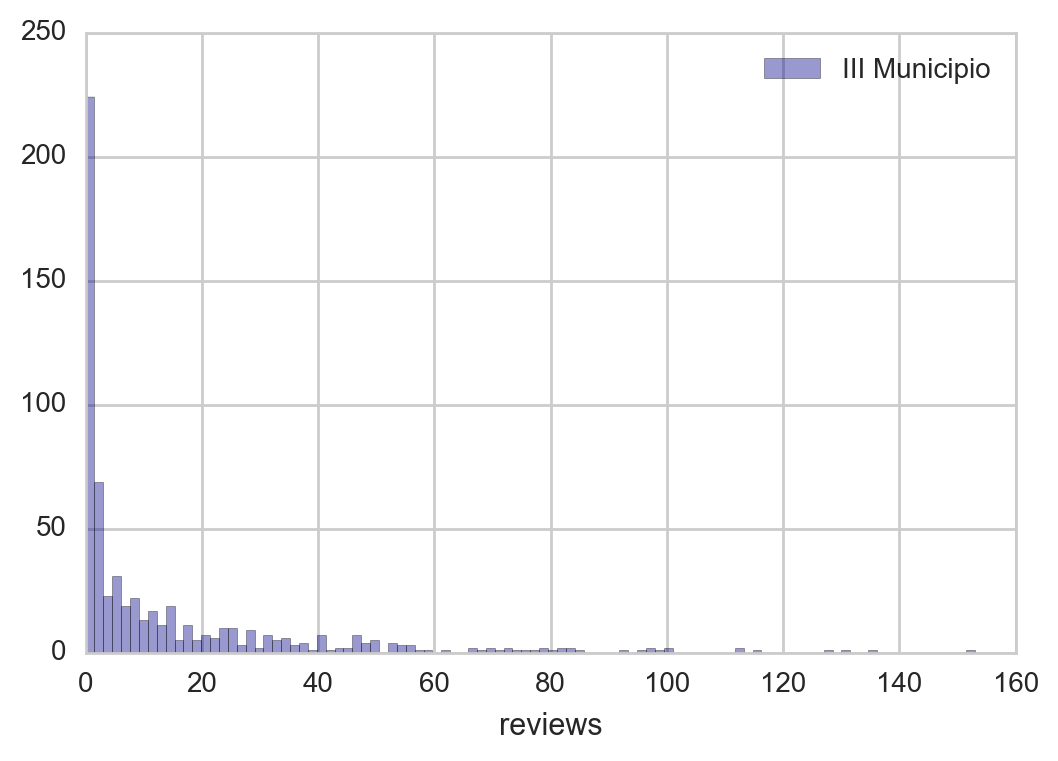

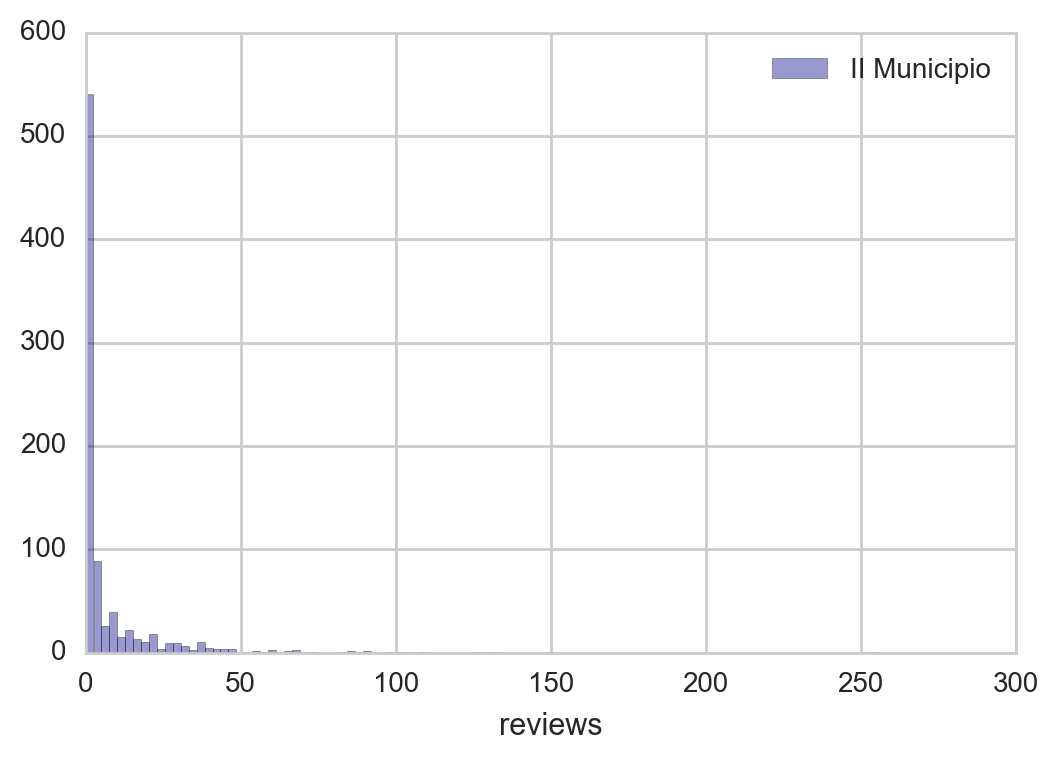

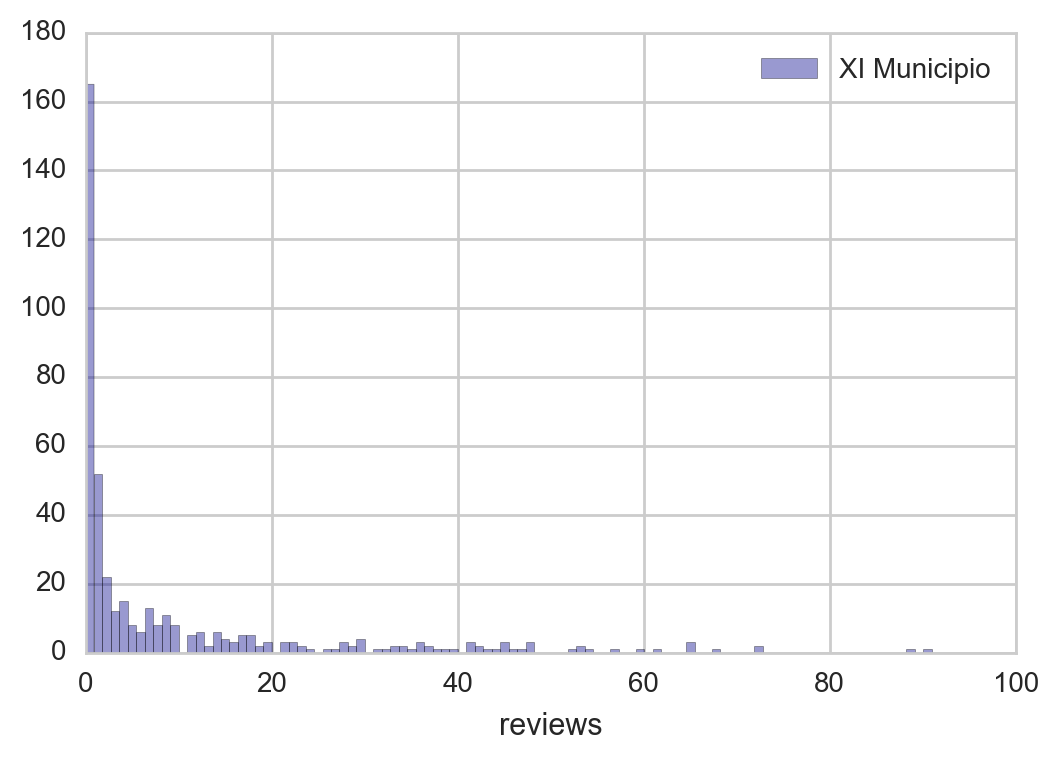

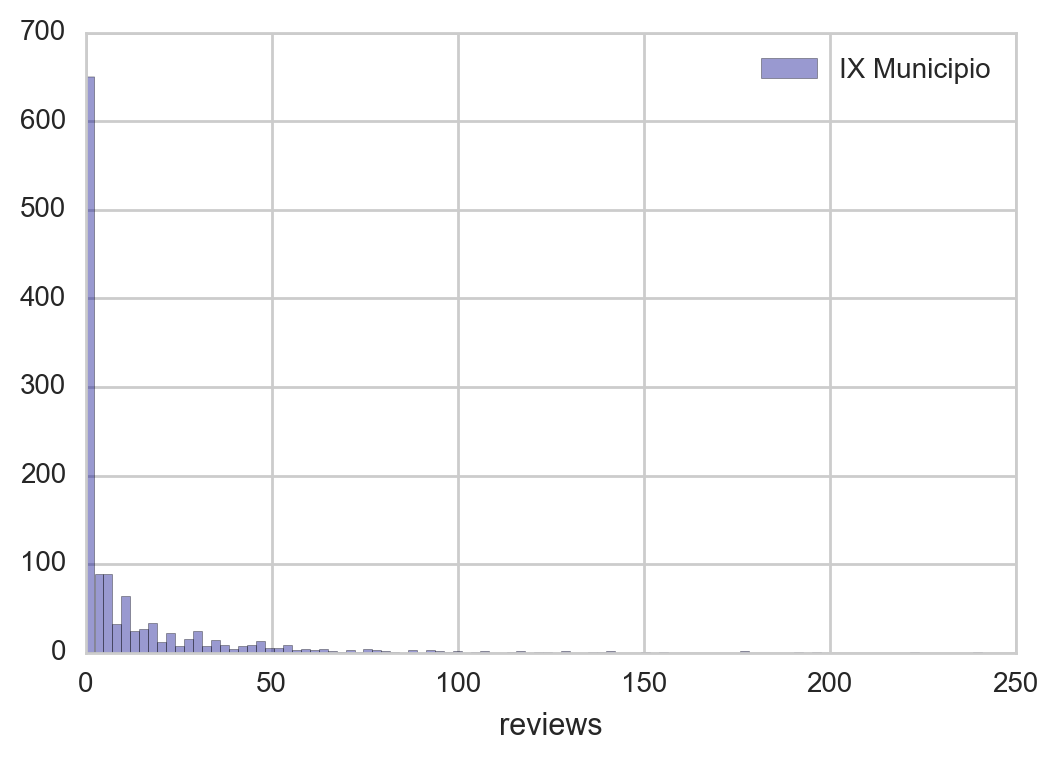

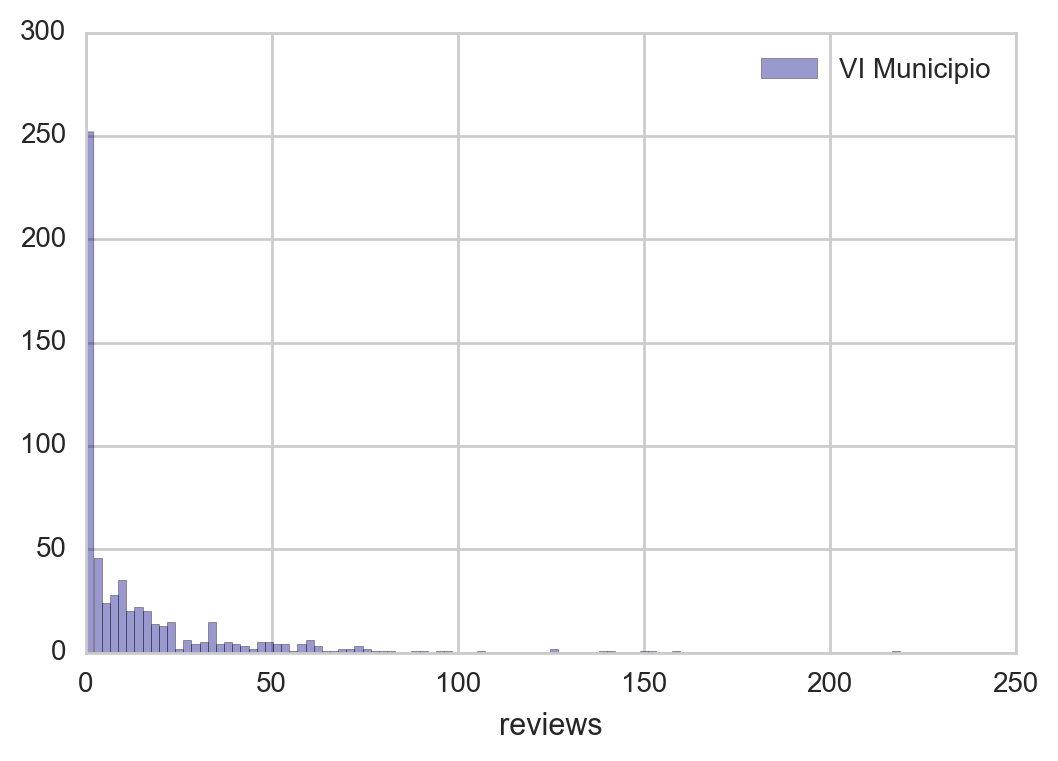

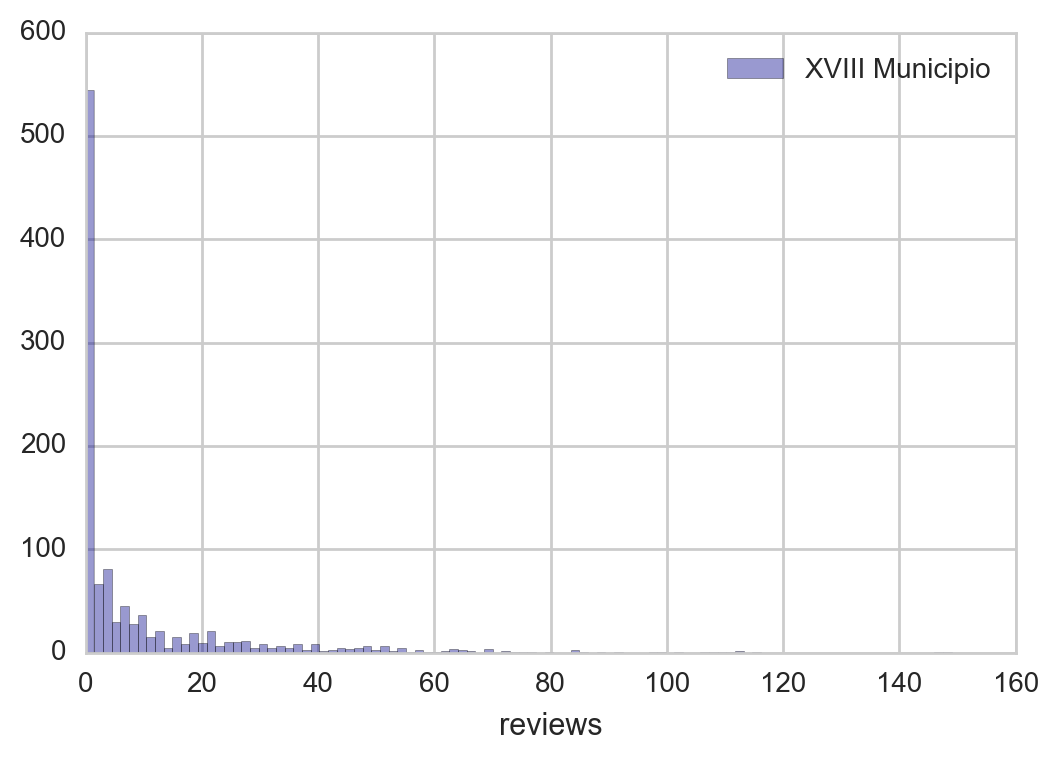

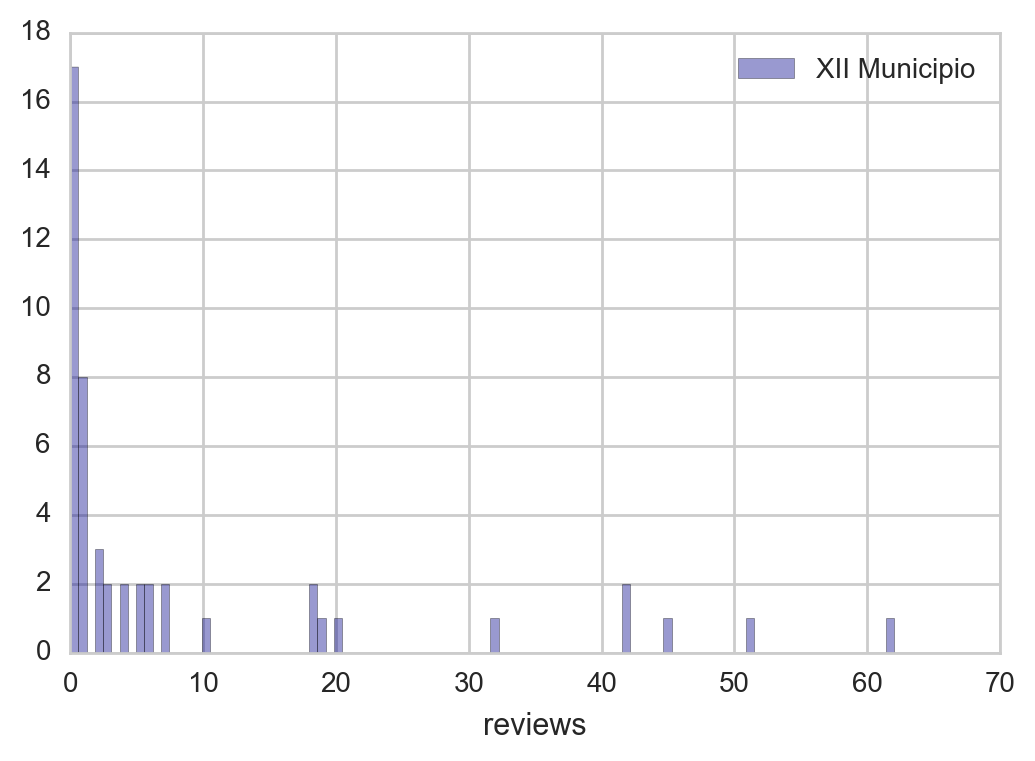

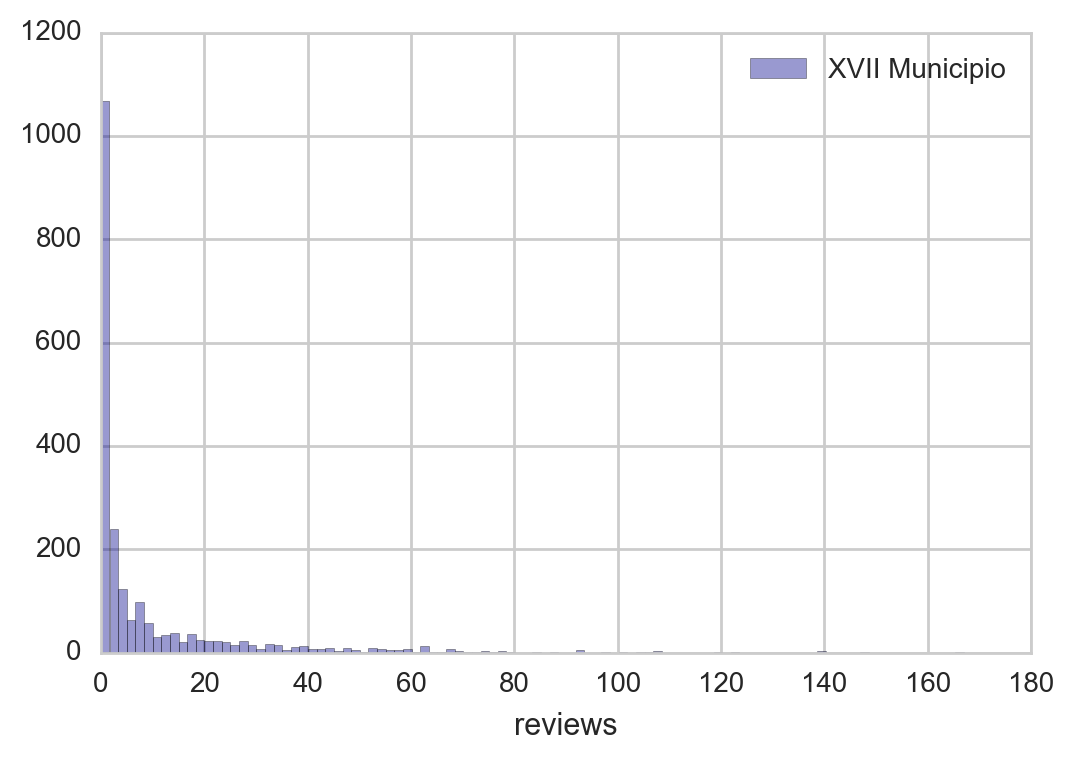

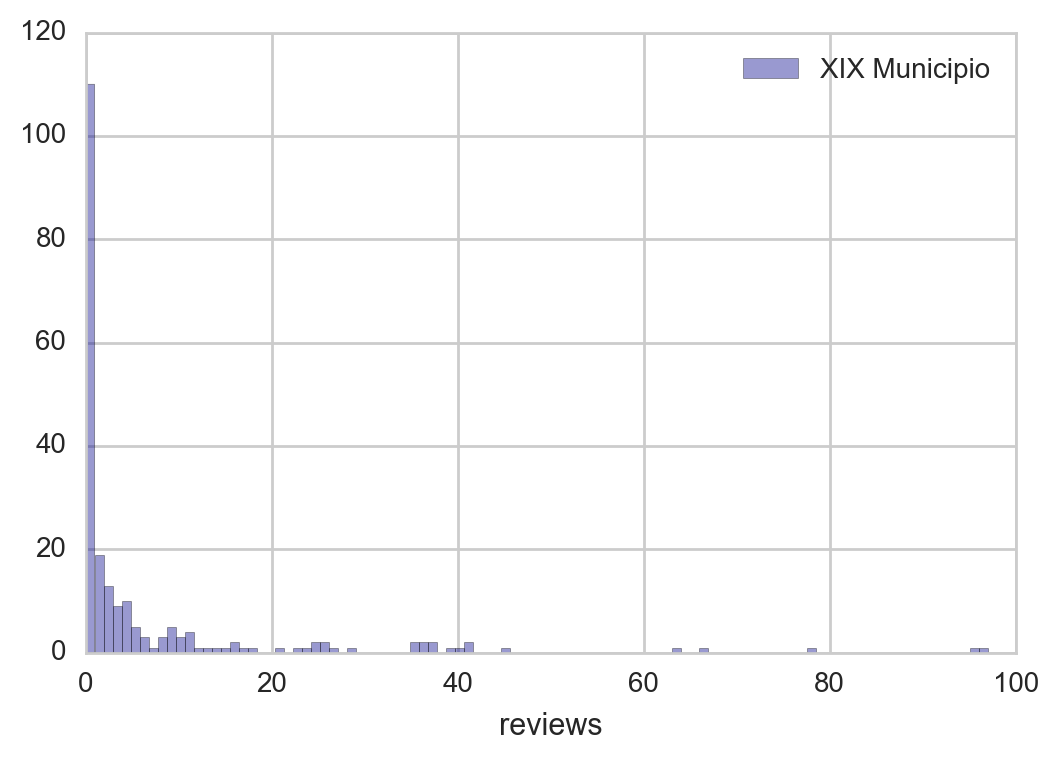

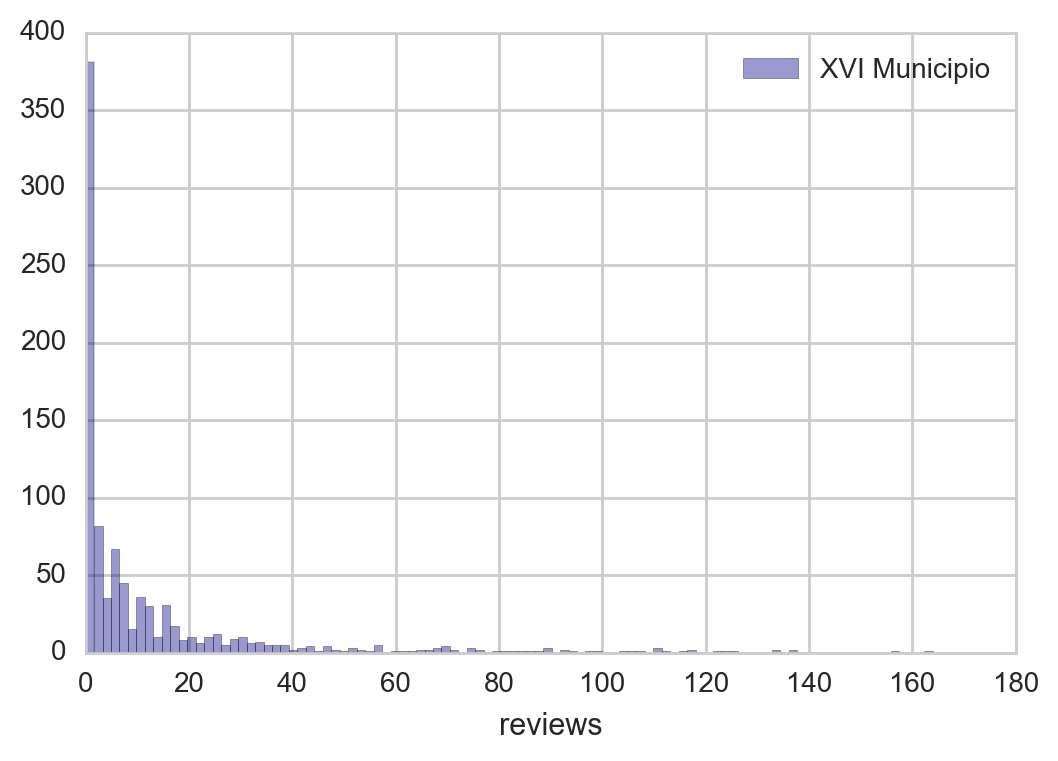

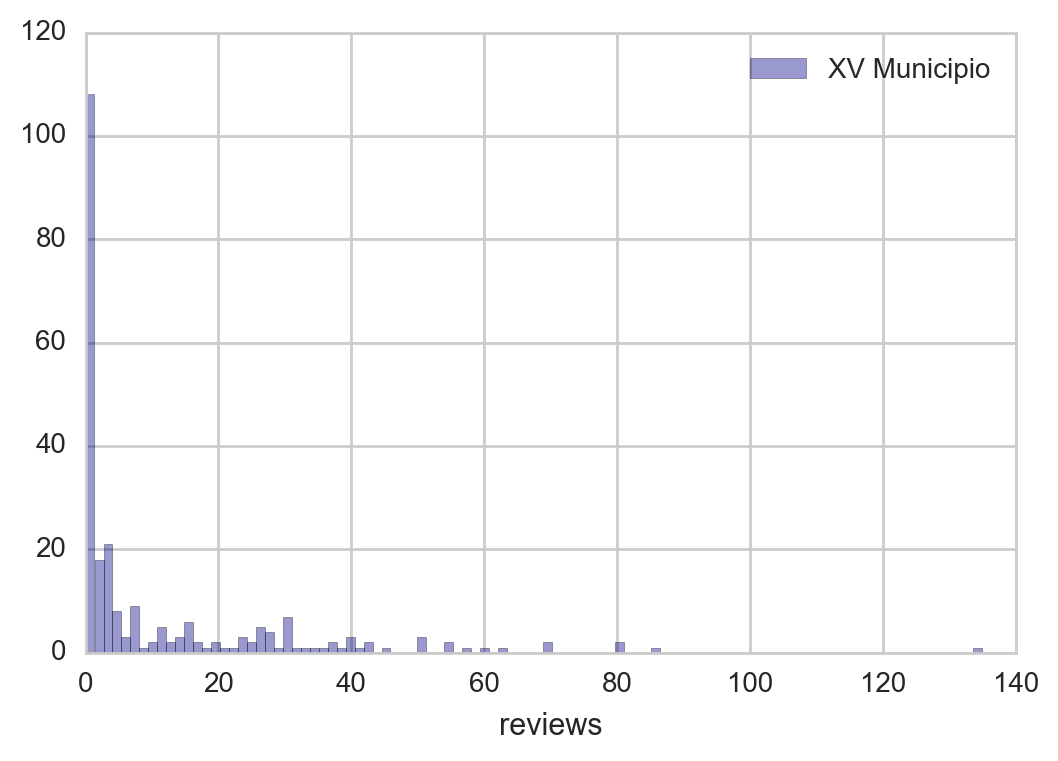

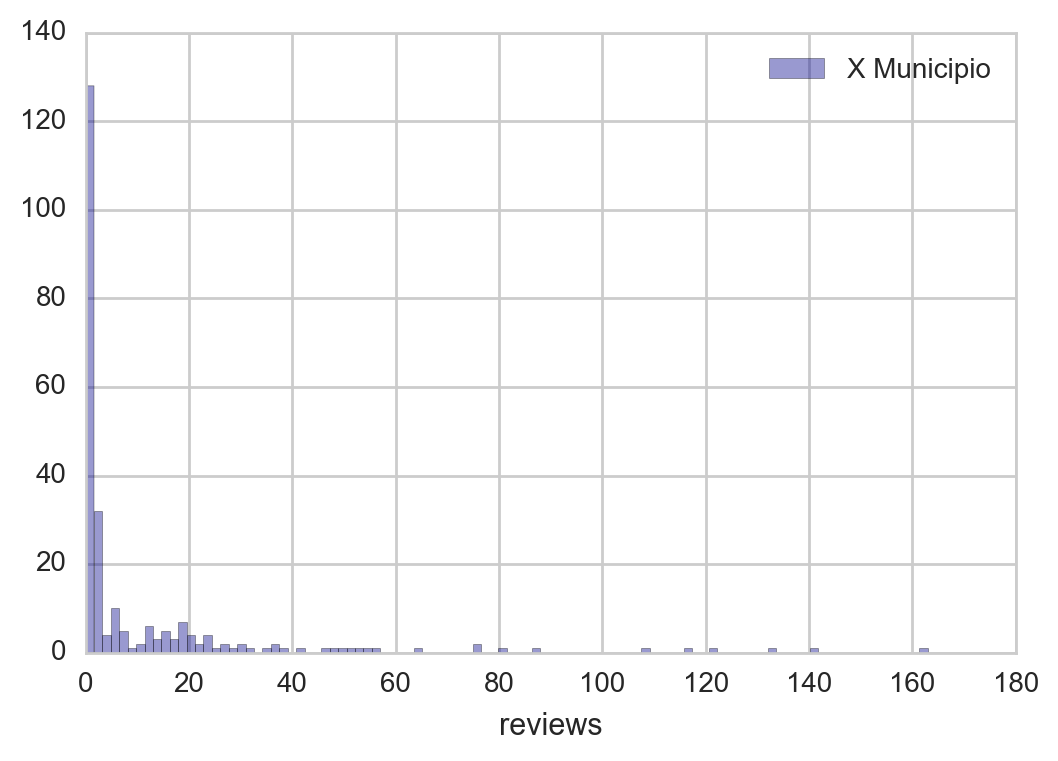

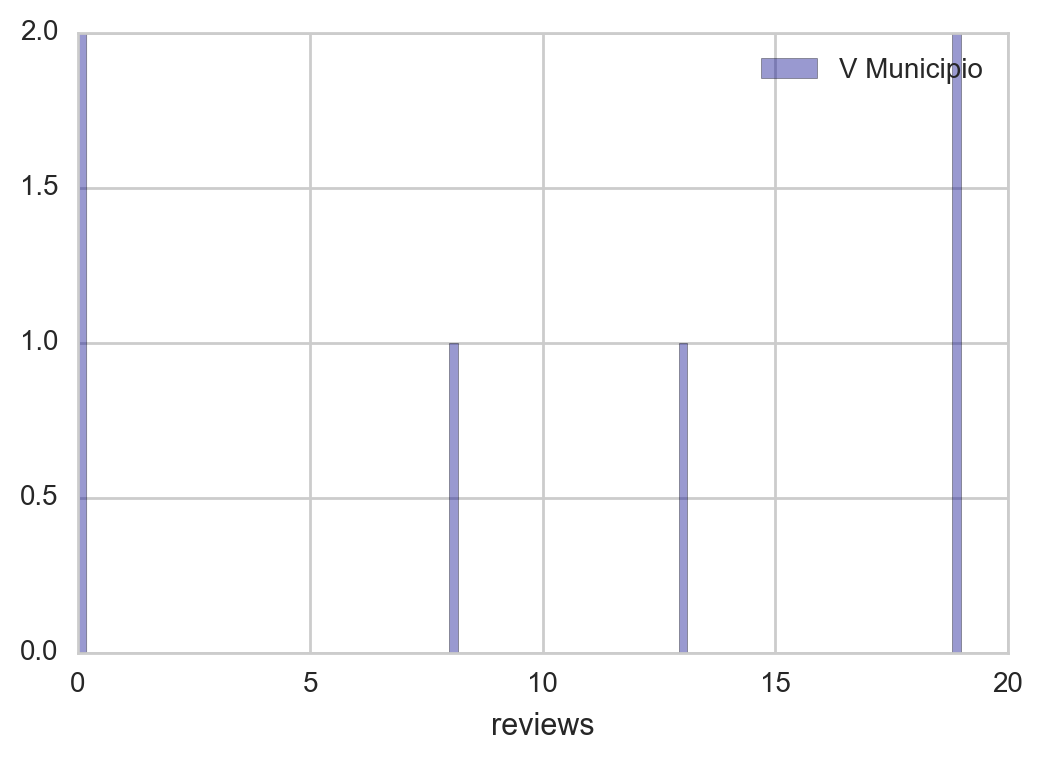

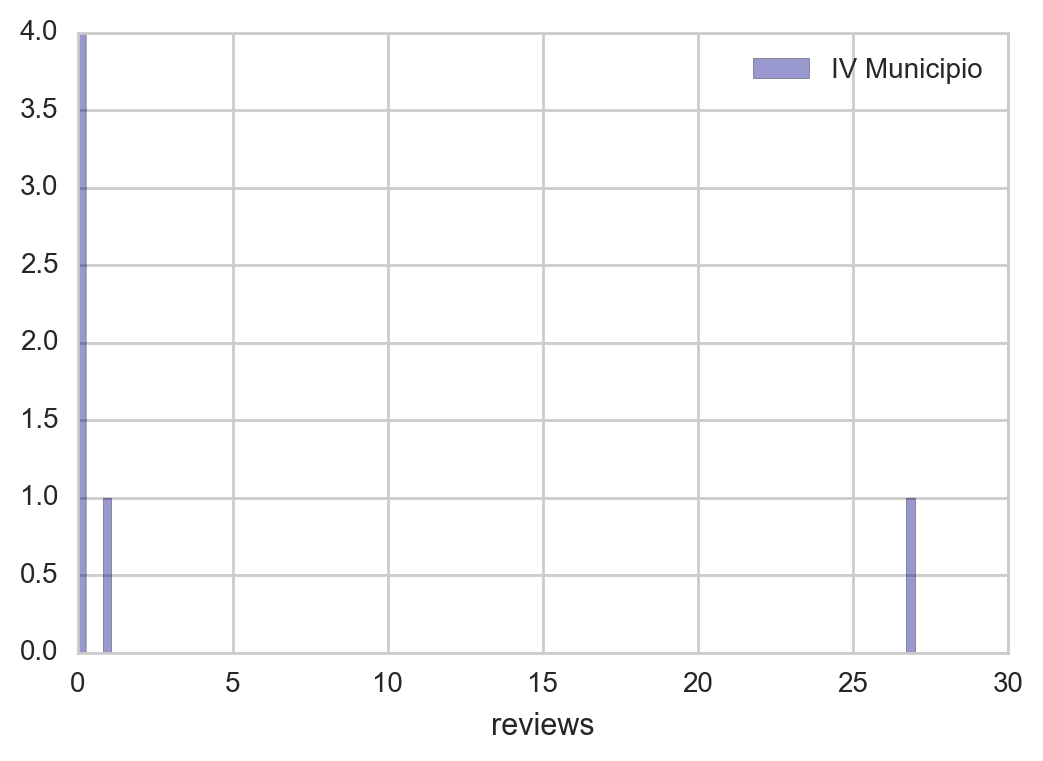

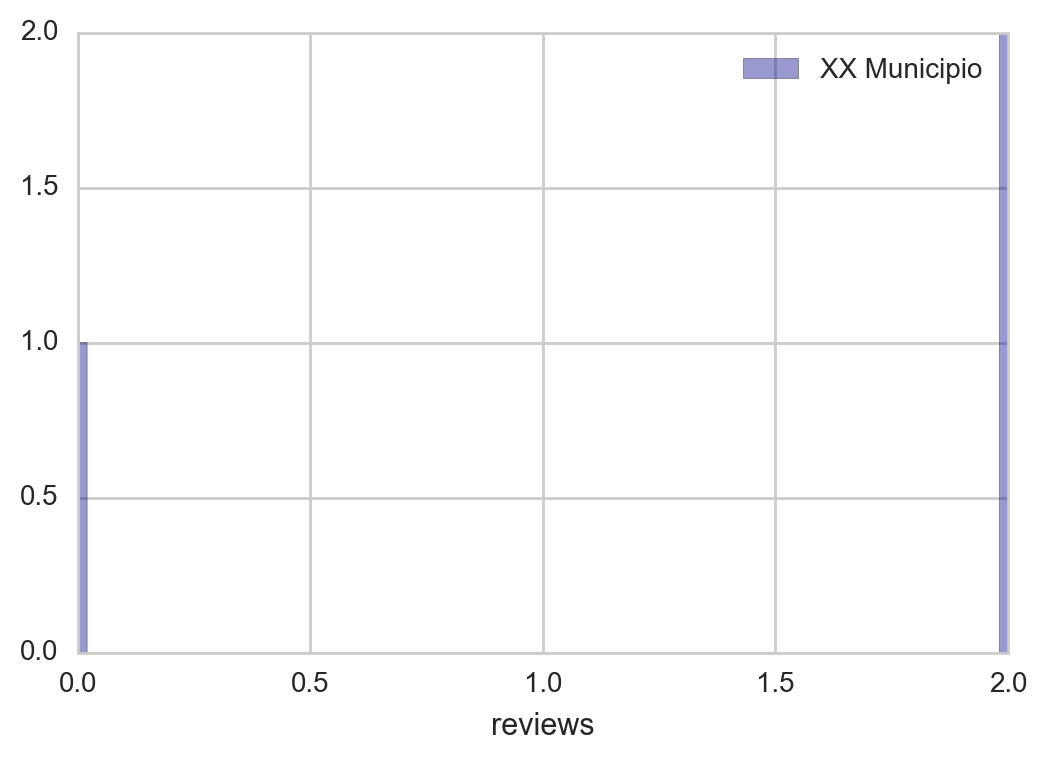

ValueError: x must be 1D or 2D

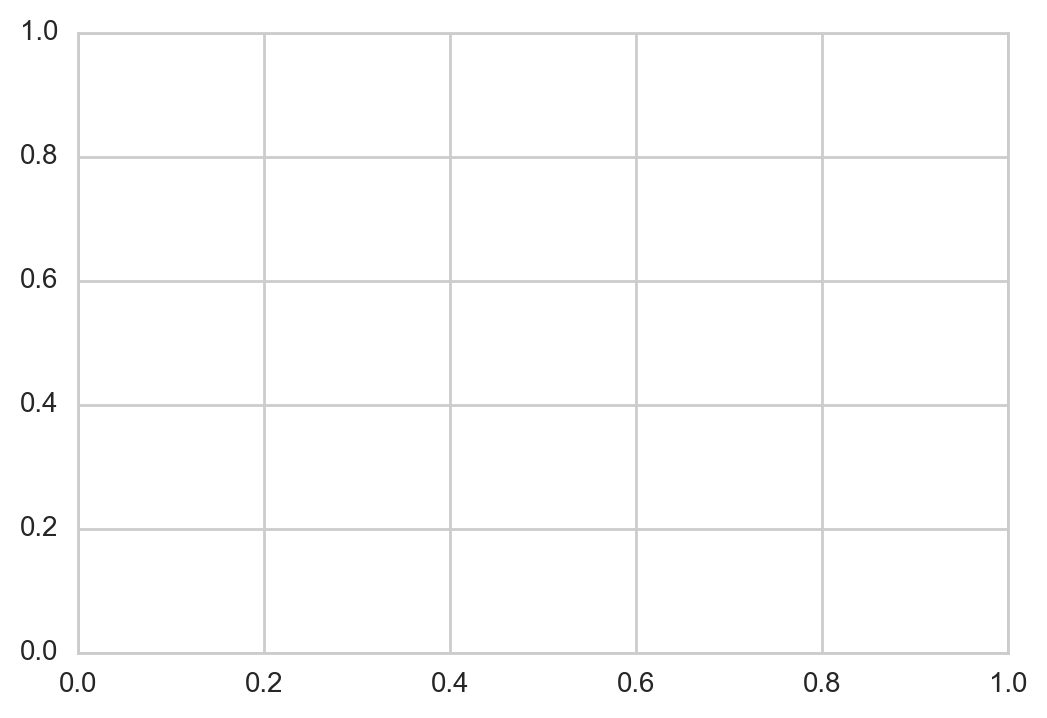

In [31]:
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(rome.neighborhood.unique())):
    ro = rome[rome.neighborhood == rome.neighborhood.unique()[i]]
    
    ax = sns.distplot(ro.reviews, color='darkblue', bins=100, kde=False, 
                      label = rome.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 00])
    plt.show()

In [32]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [33]:
df1=df1.reset_index()

In [34]:
df1.sort_values('neighborhood', inplace = True)

In [35]:
df1 = df1.reset_index()

In [36]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,I Municipio,119482,6825,137.873260
1,1,II Municipio,6737,856,110.651869


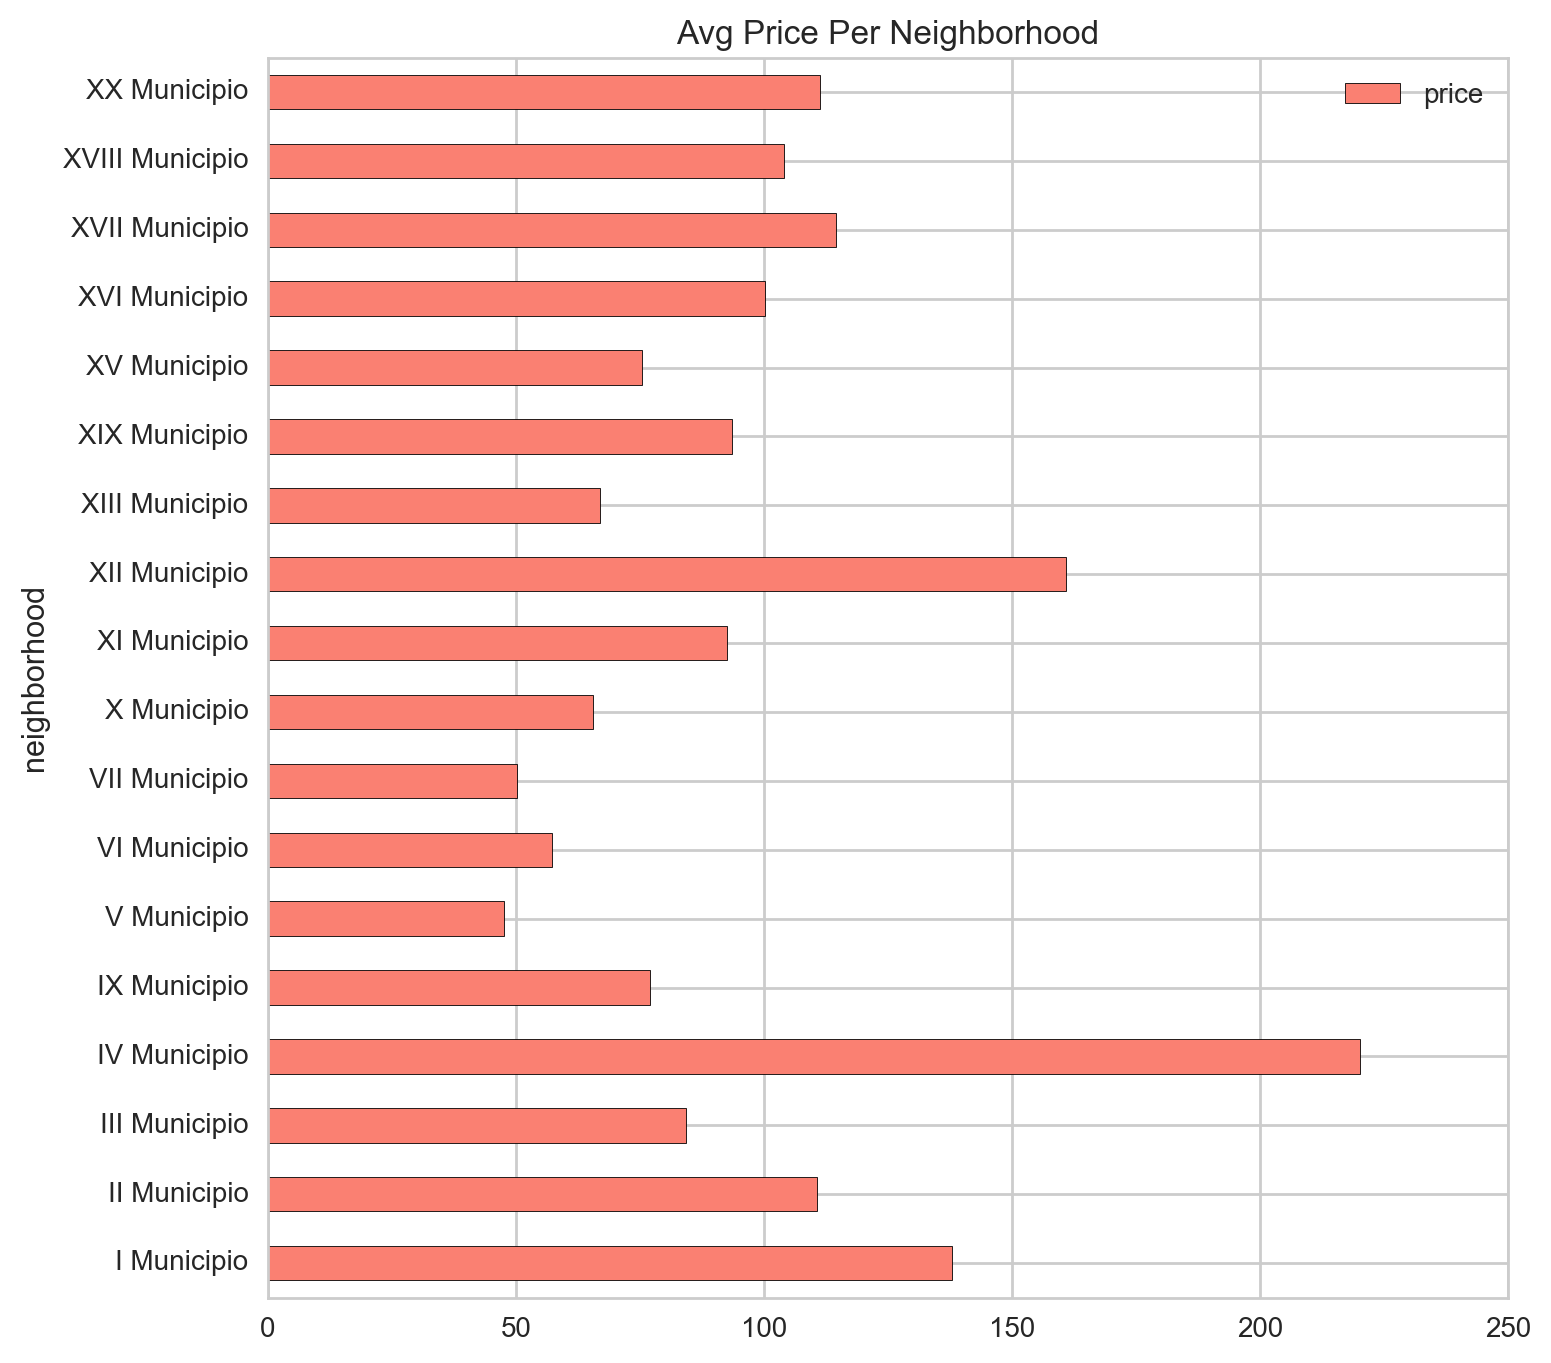

In [37]:
df1.plot(x='neighborhood', y='price', figsize=(8,8), kind = 'barh', title = 'Avg Price Per Neighborhood',
         color = 'salmon'
        )

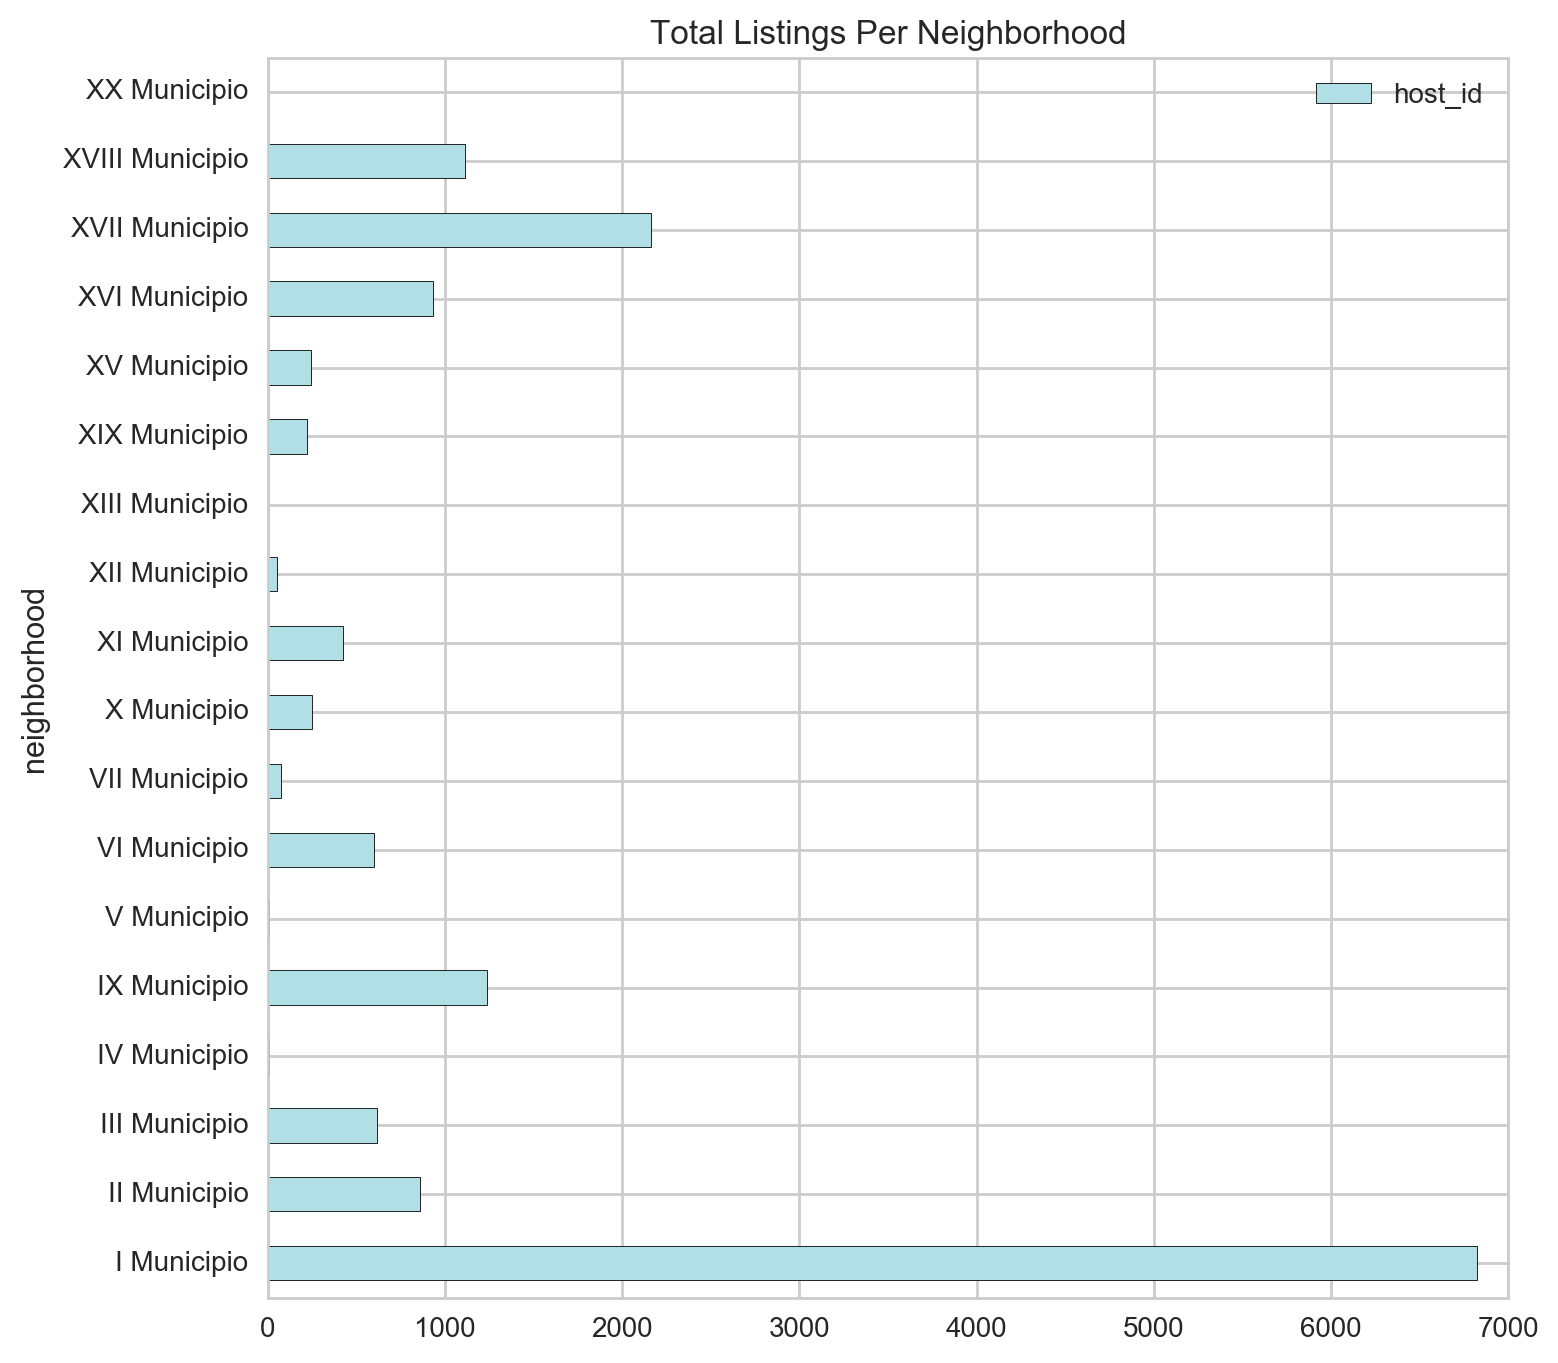

In [38]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,8), kind = 'barh',title = 'Total Listings Per Neighborhood',
         color = 'powderblue')

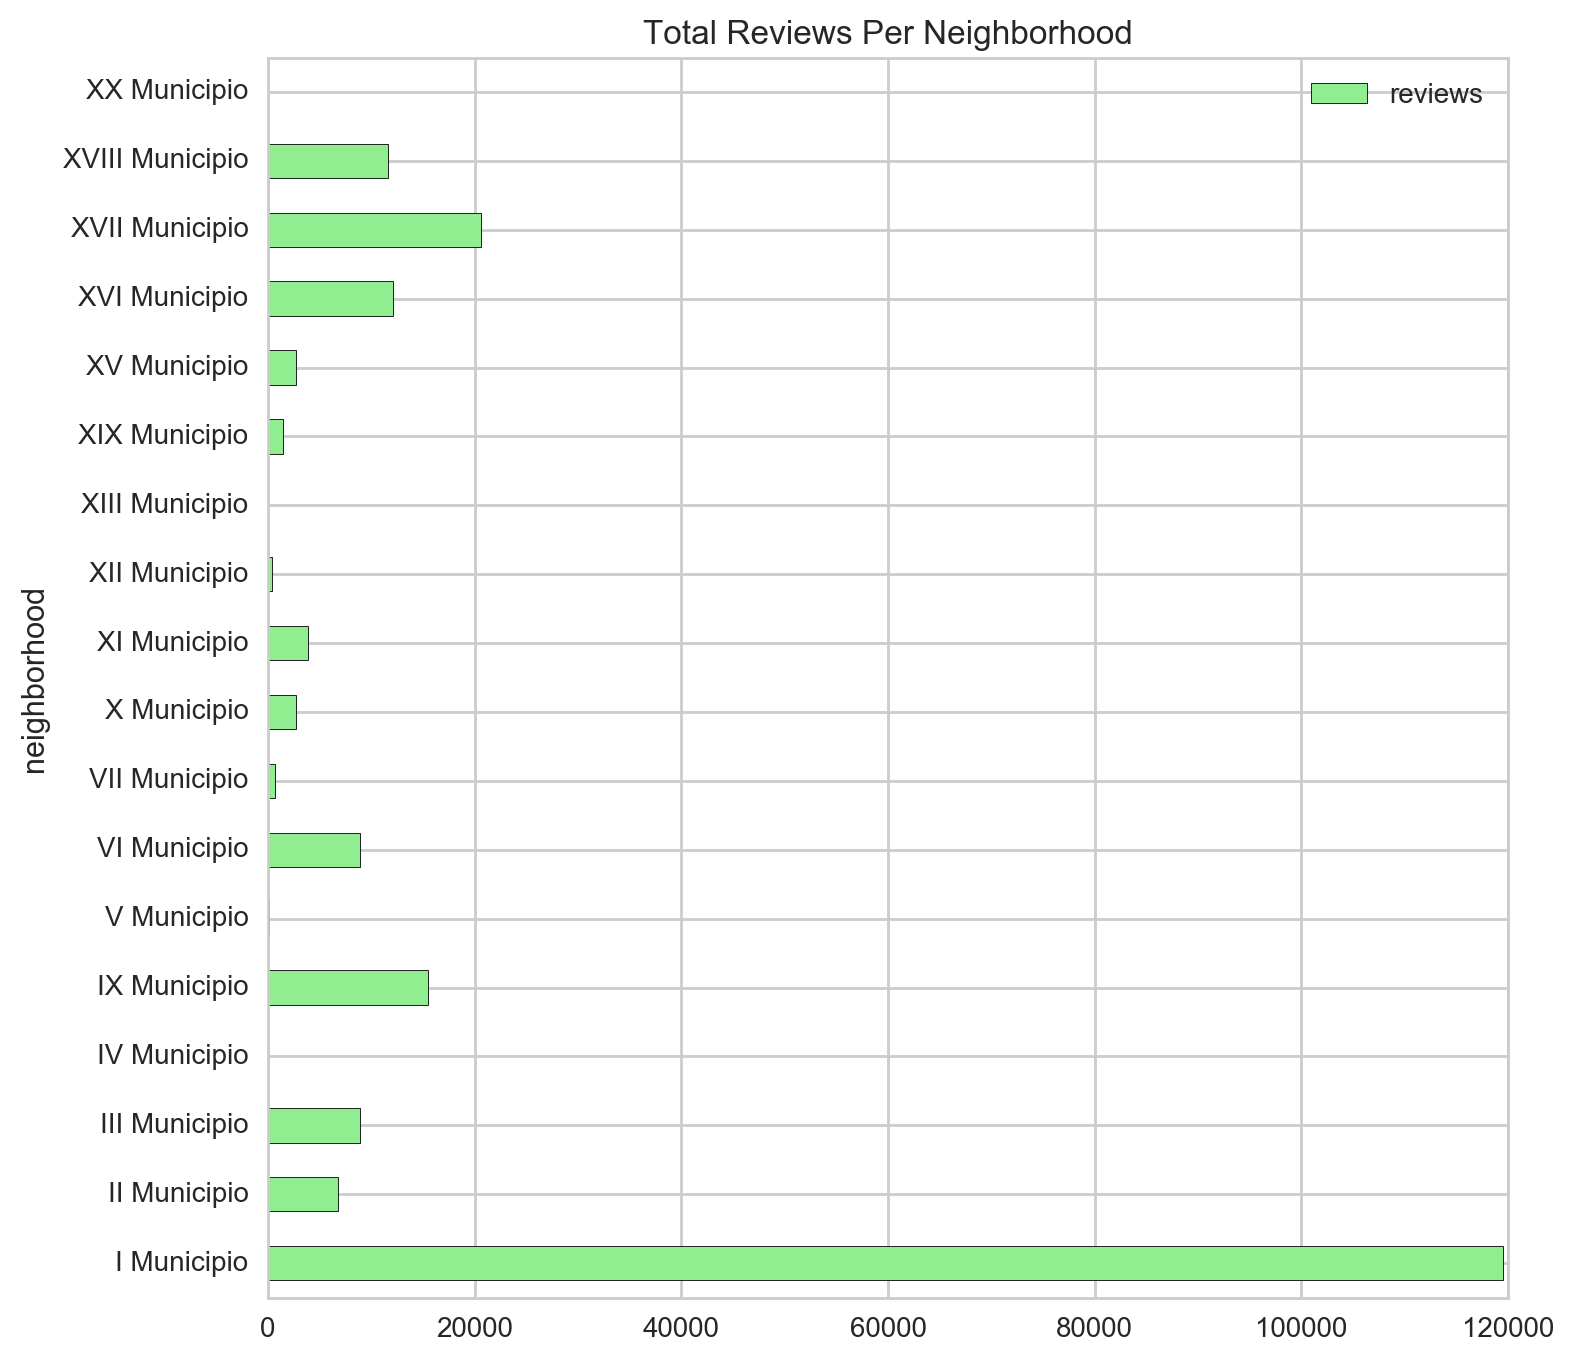

In [39]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,8), kind = 'barh',title = 'Total Reviews Per Neighborhood',
        color='lightgreen')

In [40]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(rome.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [41]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [42]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,I Municipio,91804,5026,153.069439
1,Private room,I Municipio,27230,1776,96.228041


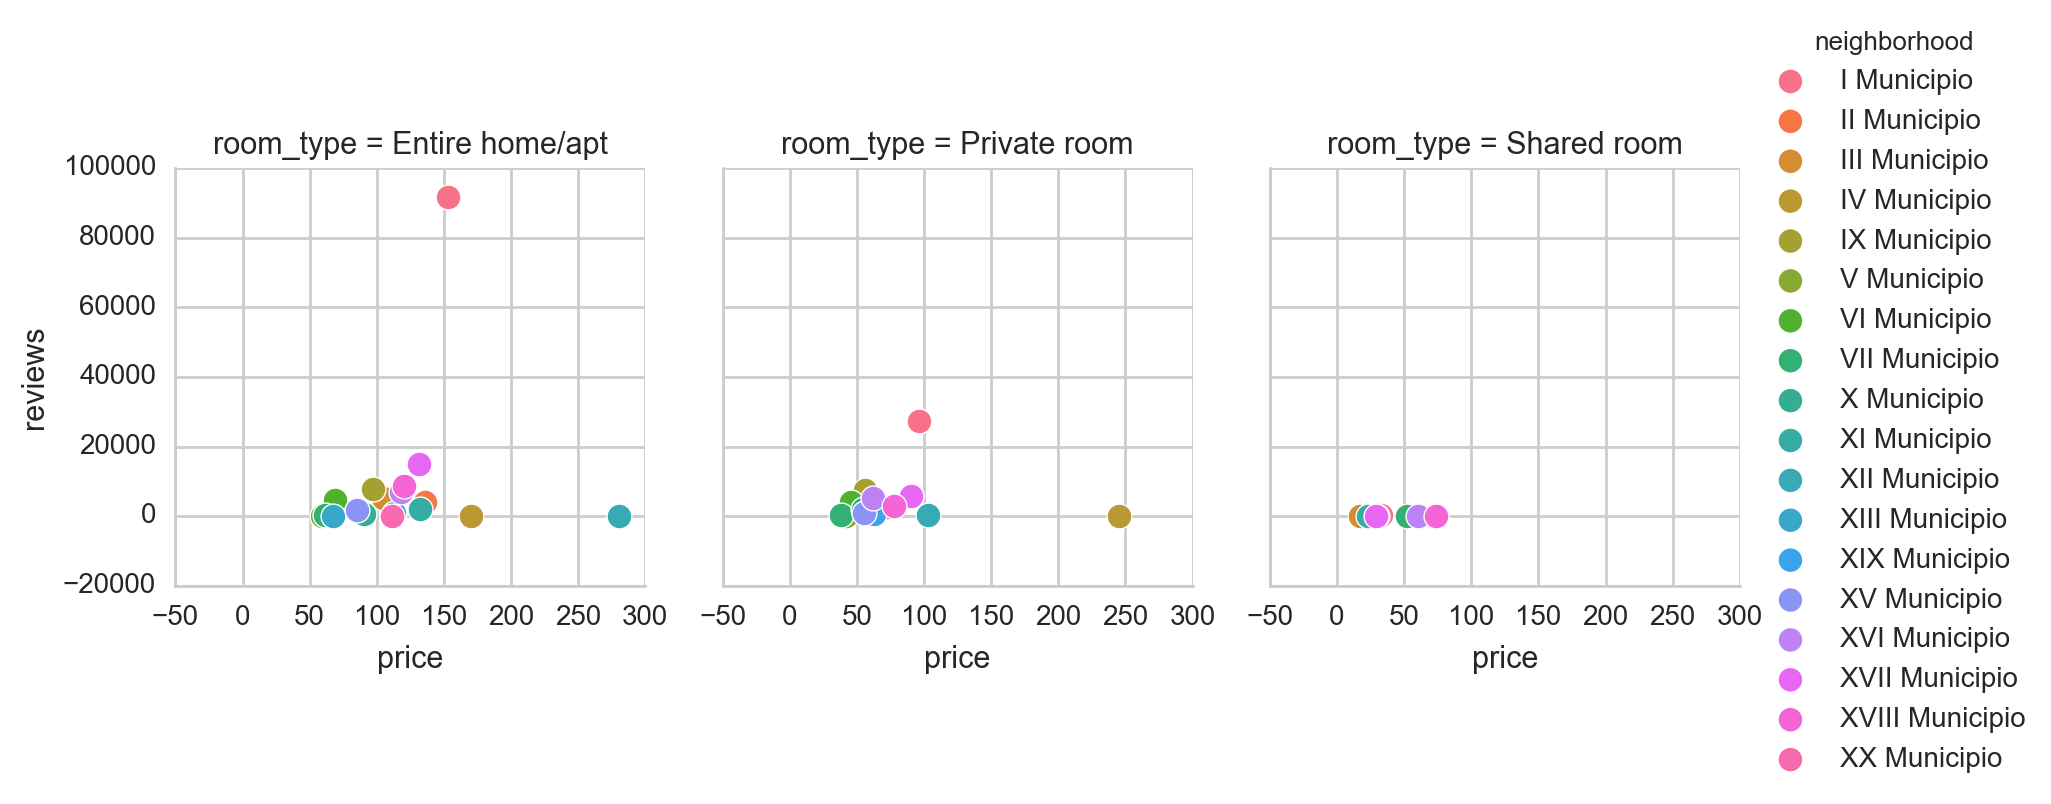

In [43]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","reviews", edgecolor="w", **kws).add_legend())

In [44]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(rome.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [45]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [46]:
df3.reset_index(inplace=True)

In [47]:
df3.head(2)

,neighborhood,room_type,bedrooms,price,bedroom_count
0,I Municipio,Entire home/apt,0.0,105.099359,312
1,I Municipio,Entire home/apt,1.0,124.093339,2357


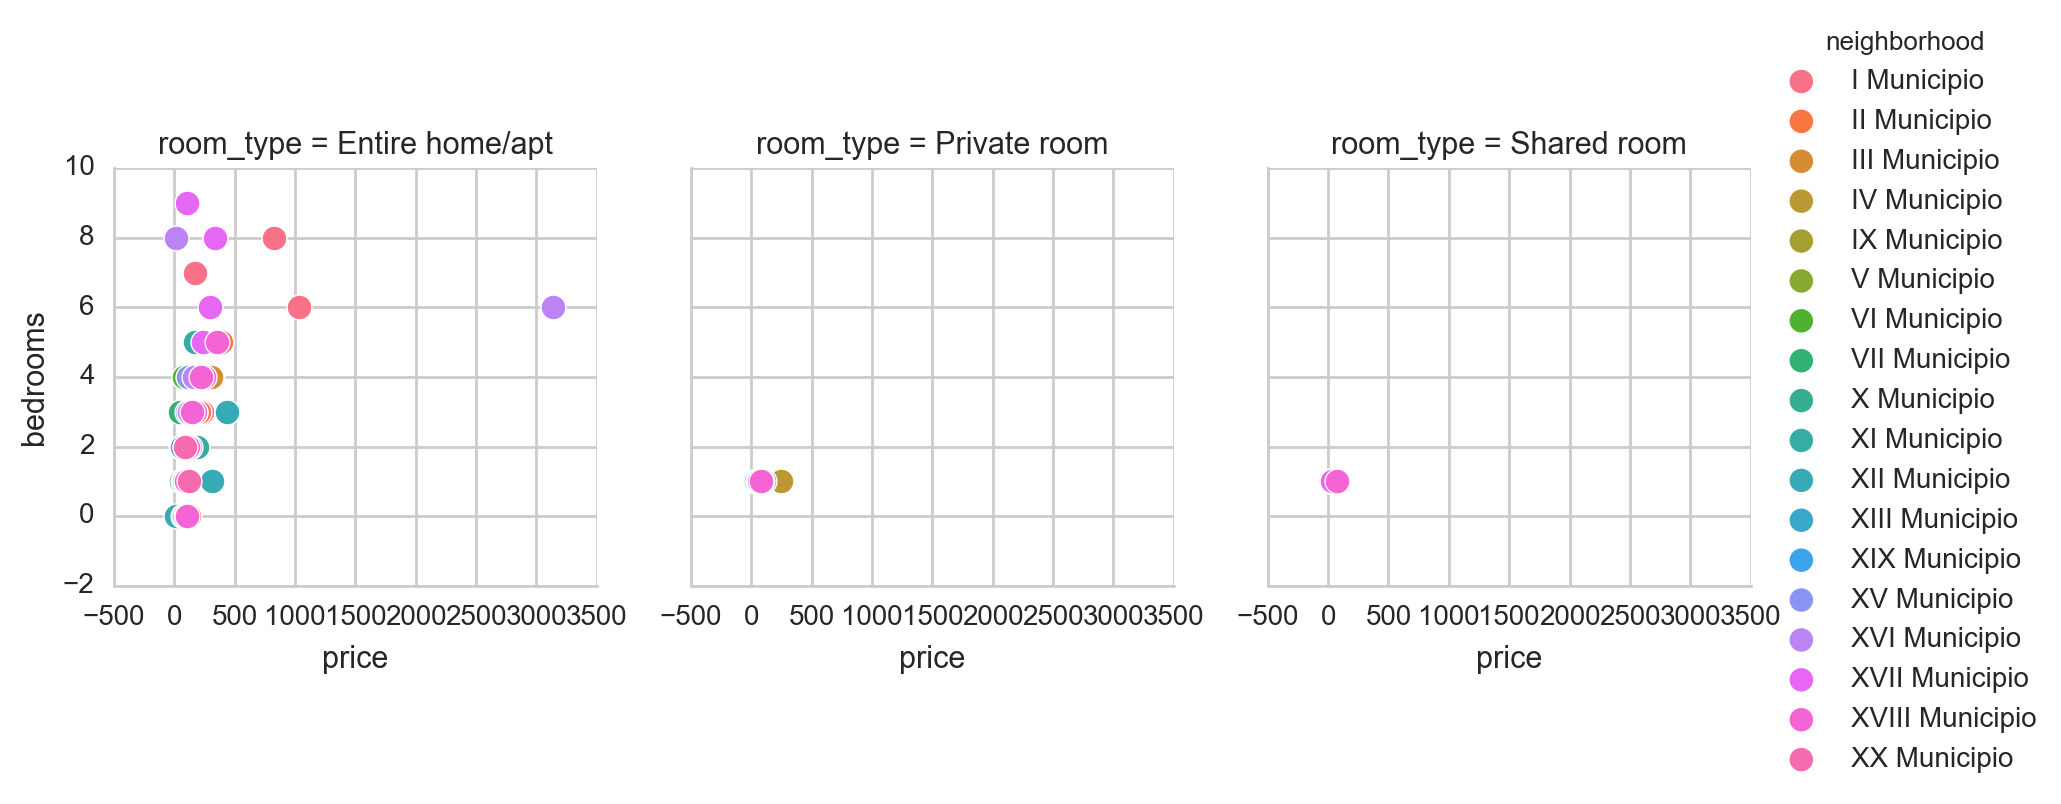

In [48]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","bedrooms", edgecolor="w", **kws).add_legend())

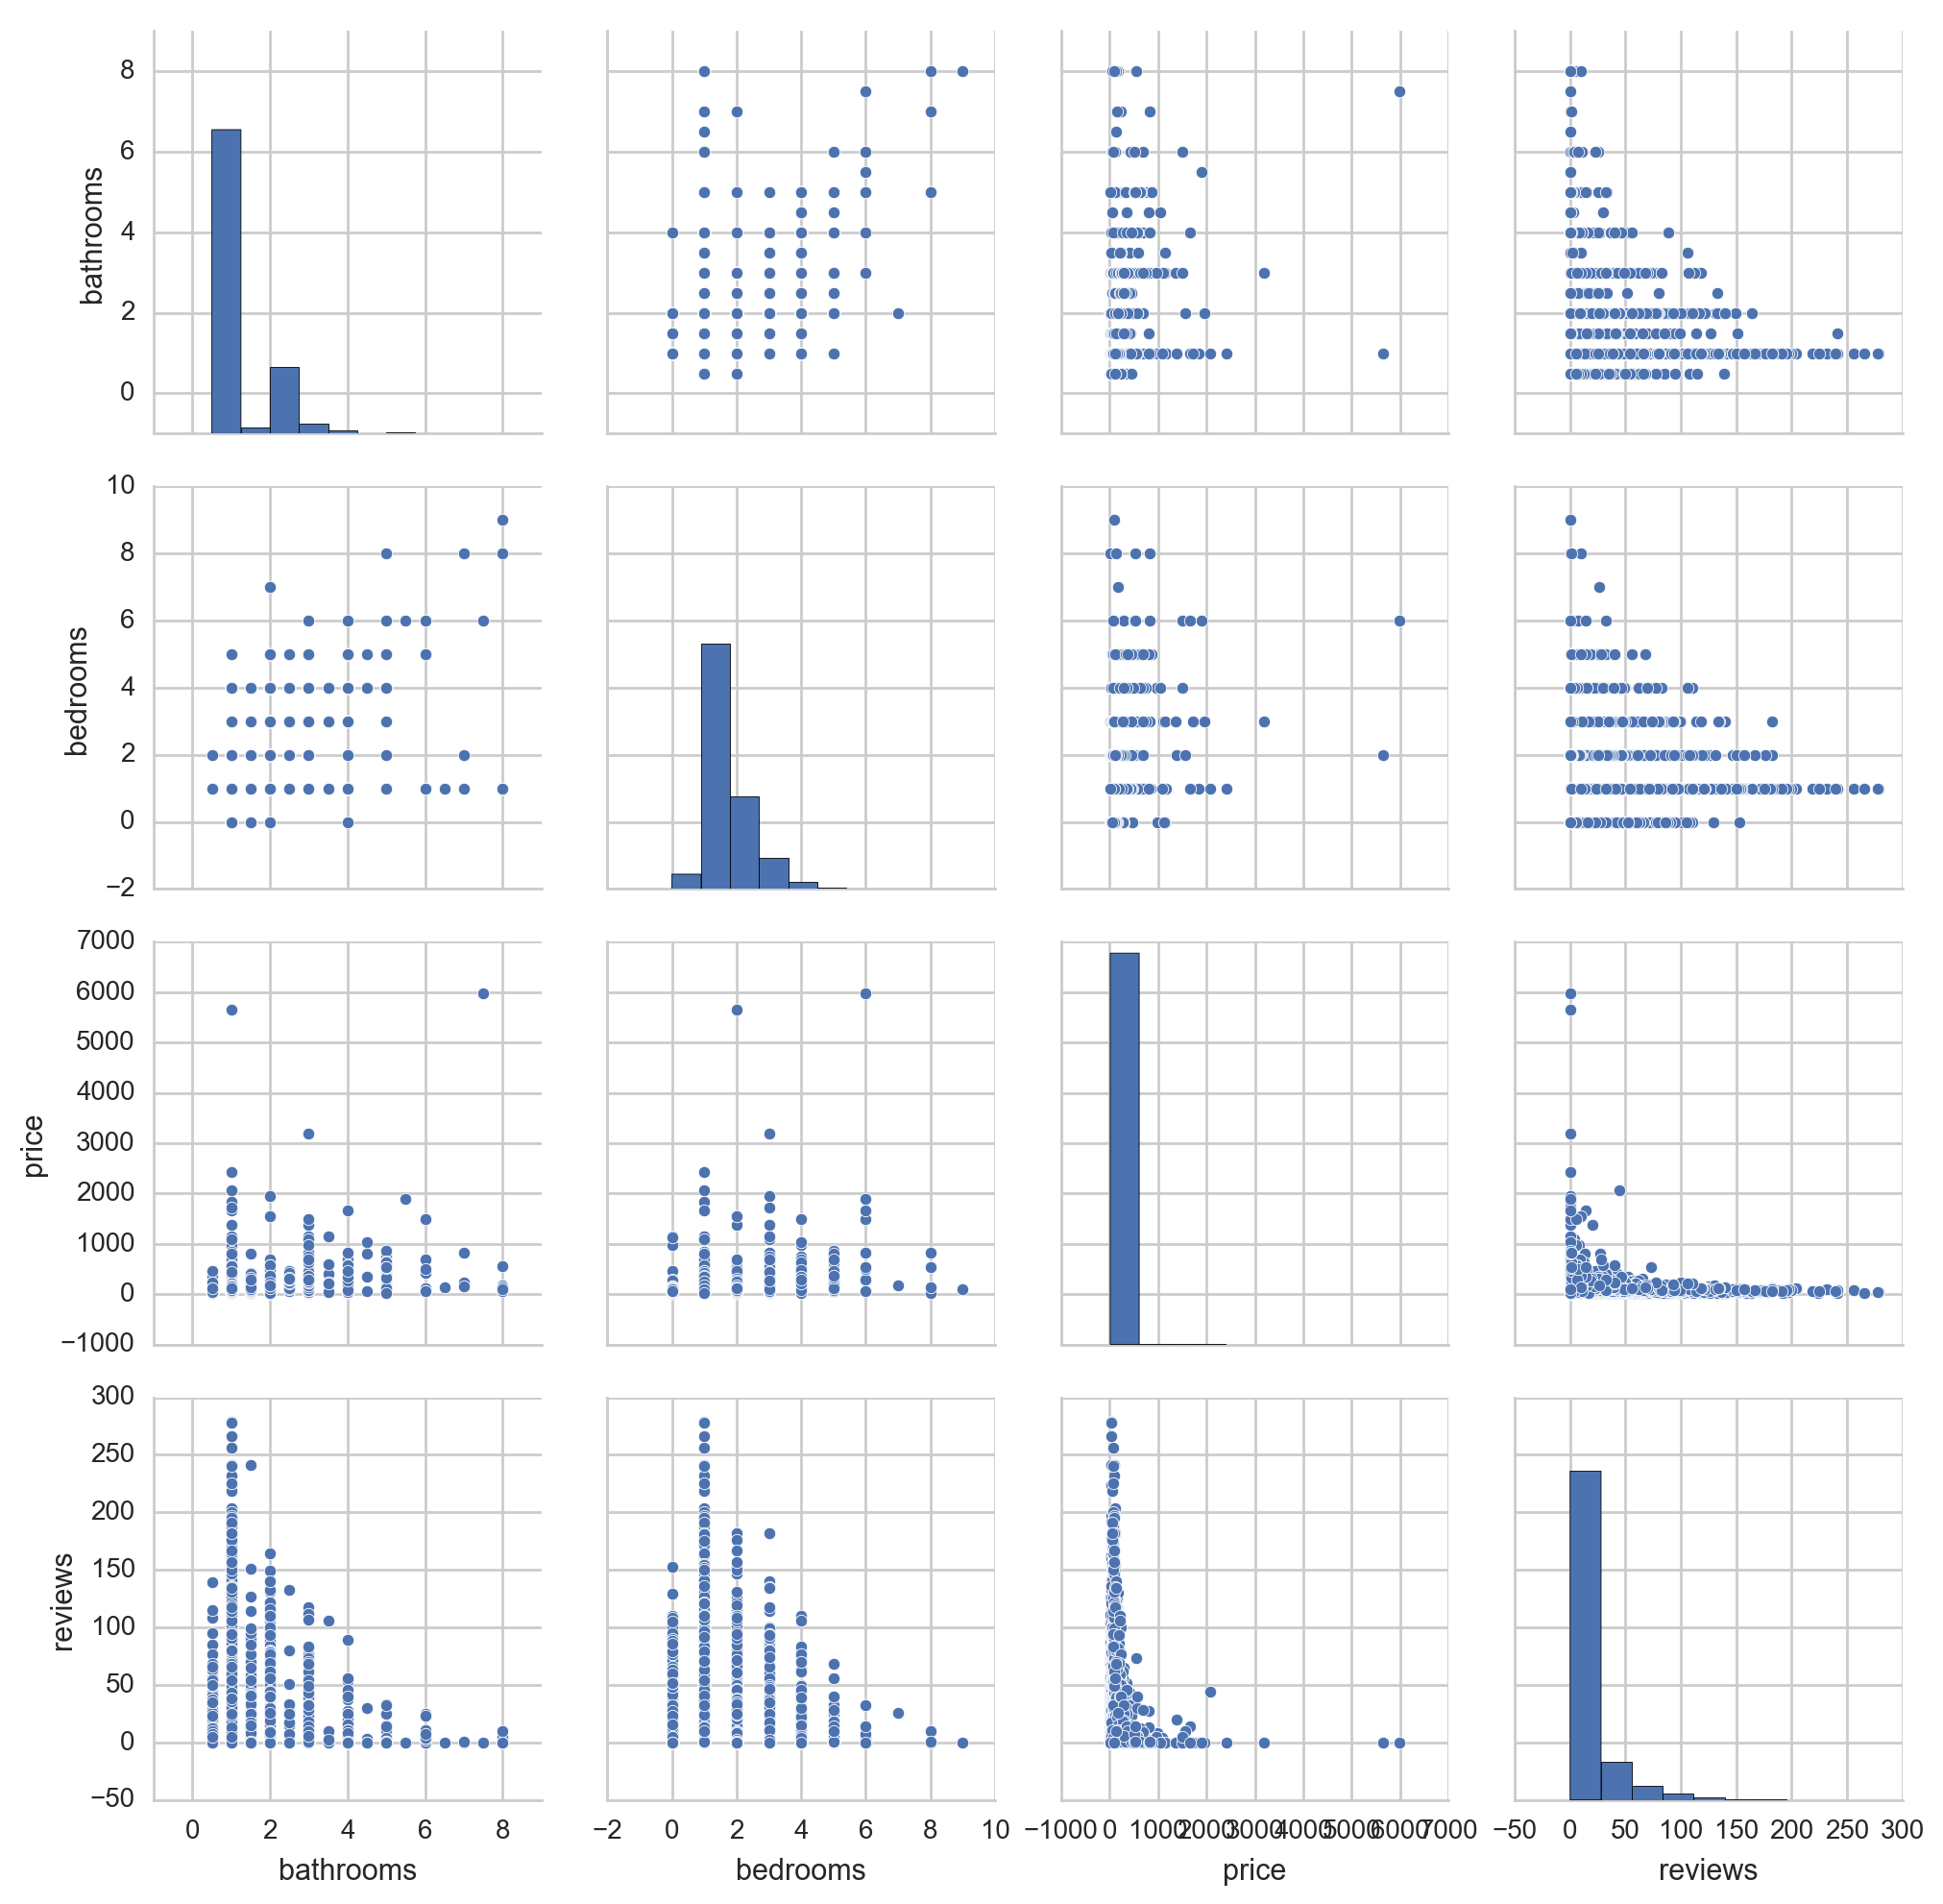

In [49]:
sns.pairplot(rome[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
                 diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
                 grid_kws=None)

In [50]:
df4_corr = rome[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

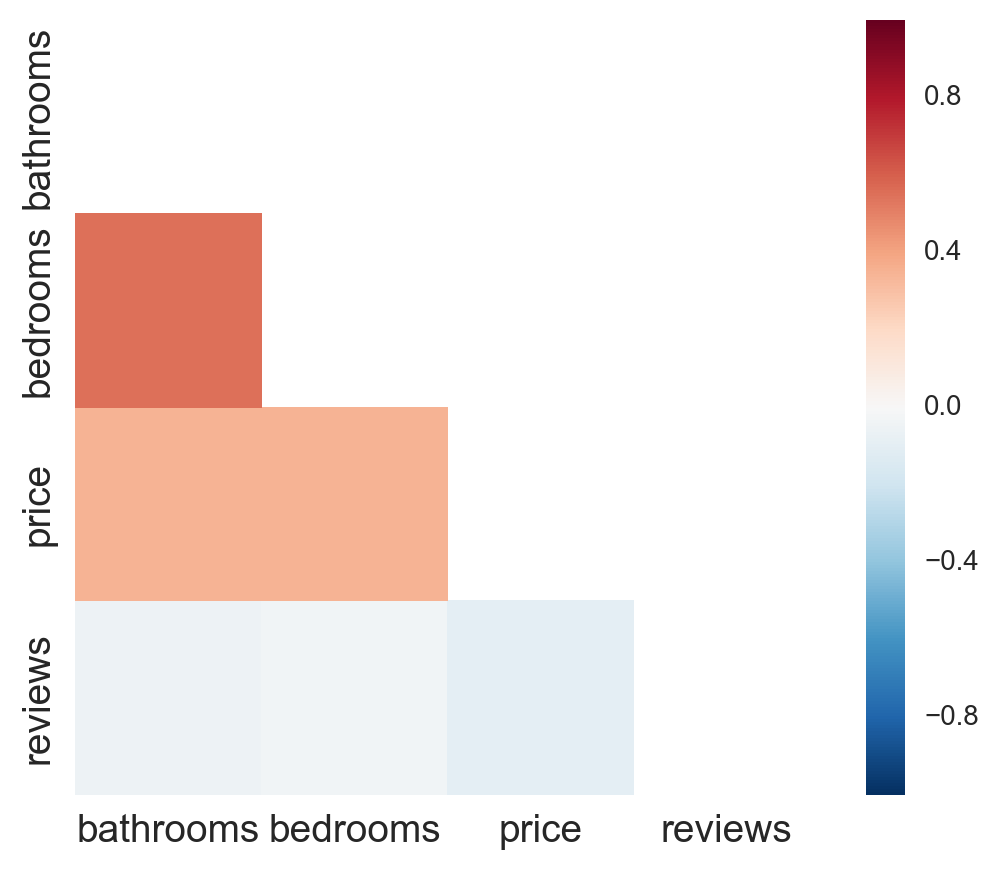

In [51]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

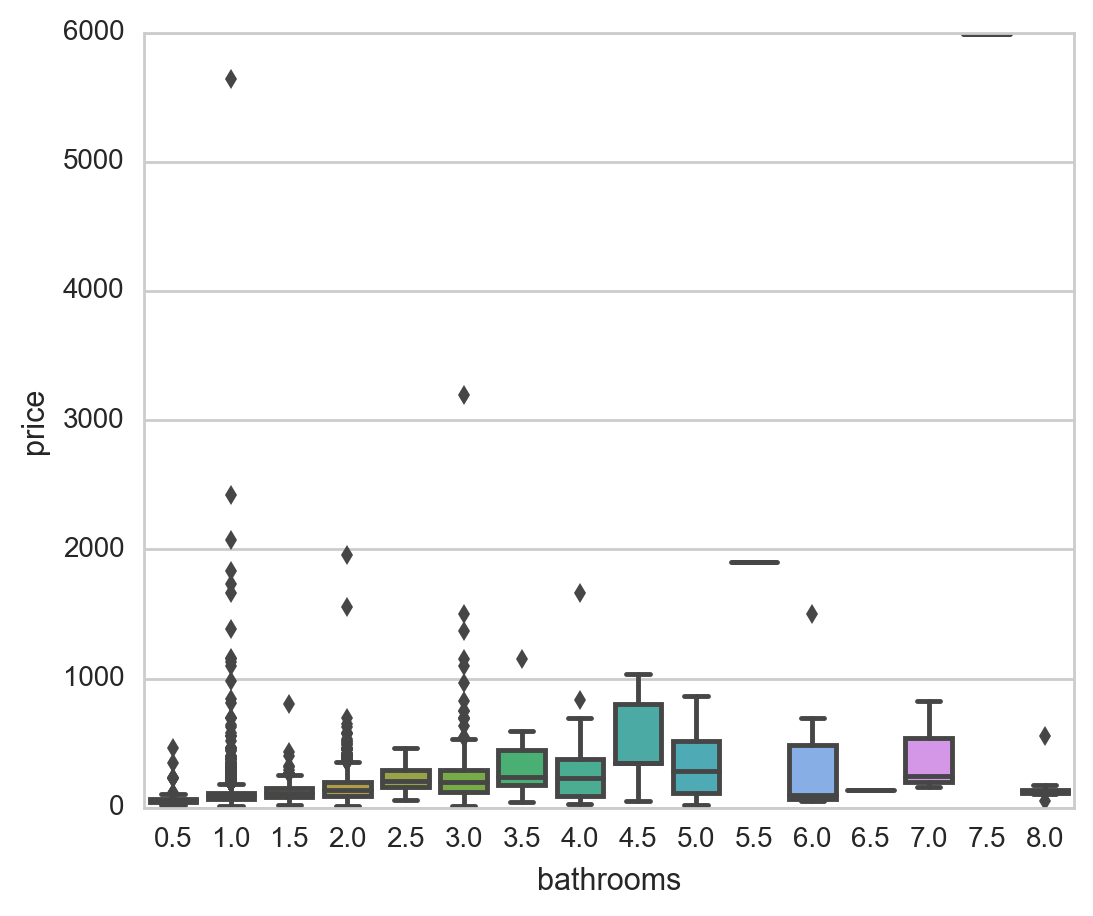

In [53]:
sns.boxplot(x='bathrooms',y='price',data=rome)

In [54]:
rome.index[rome.price == rome.price.max()]

Int64Index([15601], dtype='int64')

In [56]:
rome.ix[15601,:]

room_id                                    7977474
host_id                                   42103825
room_type                          Entire home/apt
neighborhood                         XVI Municipio
reviews                                          0
overall_satisfaction                           NaN
accommodates                                   NaN
bedrooms                                         6
bathrooms                                      7.5
price                                         5986
minstay                                          2
latitude                                   41.8848
longitude                                  12.4298
collected               2015-08-29 22:06:13.267113
Name: 15601, dtype: object

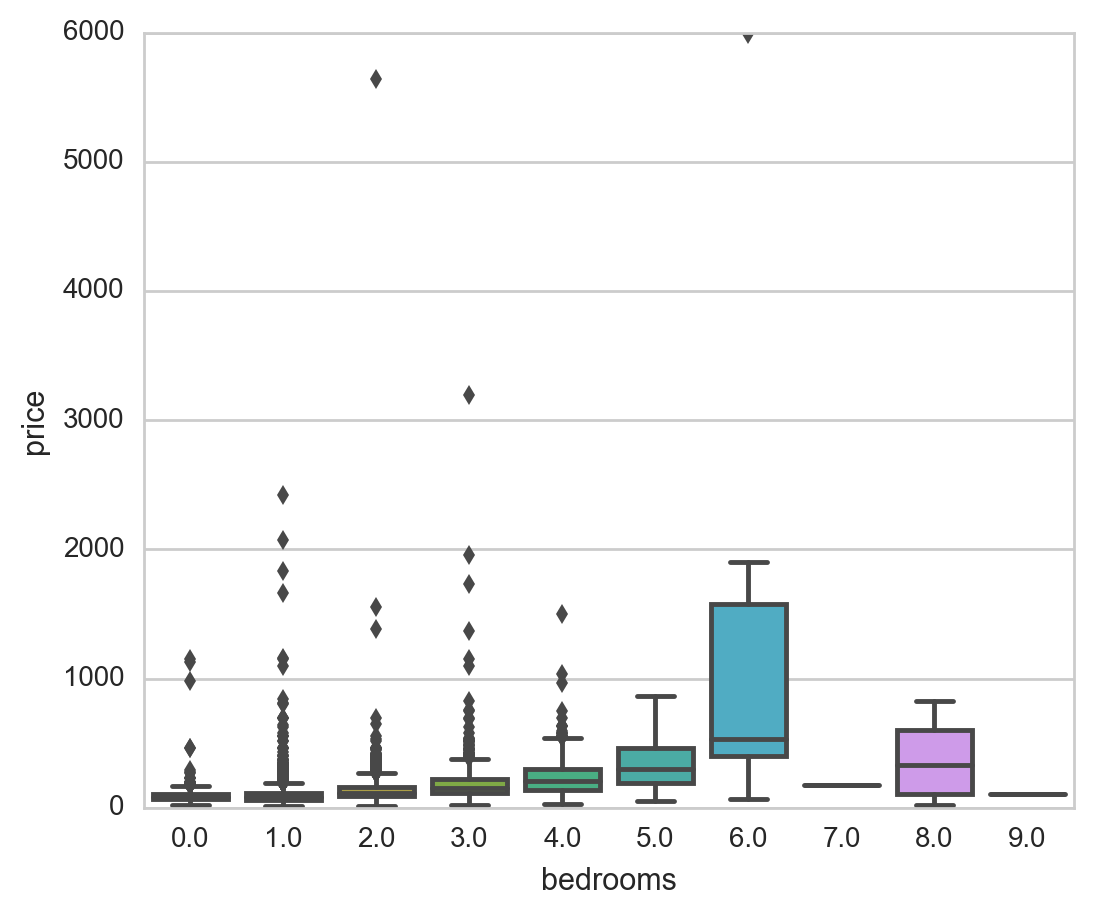

In [58]:
sns.boxplot(x='bedrooms',y='price',data=rome)